In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
data_with_pred_path = 'data_with_pred.joblib'
data_with_pred = joblib.load(data_with_pred_path)
index_info = json.load(open('index_info.json', 'r'))
# load the data with predictions
model_list = np.array(["CAT","CNN","GBM","LR","MLP","RF","SVR","TRANS","XBG","Diffusion"])
data_with_pred["ECNumber"]

0          4.2.3.4
1          4.2.3.4
2          4.2.3.4
3        2.1.1.255
4        2.1.1.255
           ...    
17005     1.1.1.82
17006     1.1.1.82
17007     1.1.1.82
17008     1.1.1.82
17009     1.1.1.82
Name: ECNumber, Length: 17010, dtype: object

In [3]:
data_with_pred["protein_id"]=[int(i.split(".")[0]) for i in data_with_pred["ECNumber"]]
data_with_pred["protein_id"]
PROTEIN_TYPES_NAMES=np.array([None,"Oxidoreductases","Transferases","Hydrolases","Lyases","Isomerases","Ligases","Translocases"])

data_with_pred["protein_label"]=data_with_pred["protein_id"].astype(str)+"_"+PROTEIN_TYPES_NAMES[data_with_pred["protein_id"]]
data_with_pred[["protein_id","protein_label"]]

protein_id      protein_label
0               4           4_Lyases
1               4           4_Lyases
2               4           4_Lyases
3               2     2_Transferases
4               2     2_Transferases
...           ...                ...
17005           1  1_Oxidoreductases
17006           1  1_Oxidoreductases
17007           1  1_Oxidoreductases
17008           1  1_Oxidoreductases
17009           1  1_Oxidoreductases

[17010 rows x 2 columns]

In [4]:
test_with_pred= data_with_pred.copy().loc[index_info['test_index'],:]
train_with_pred= data_with_pred.copy().loc[index_info['train_index'],:]

## error_label plot

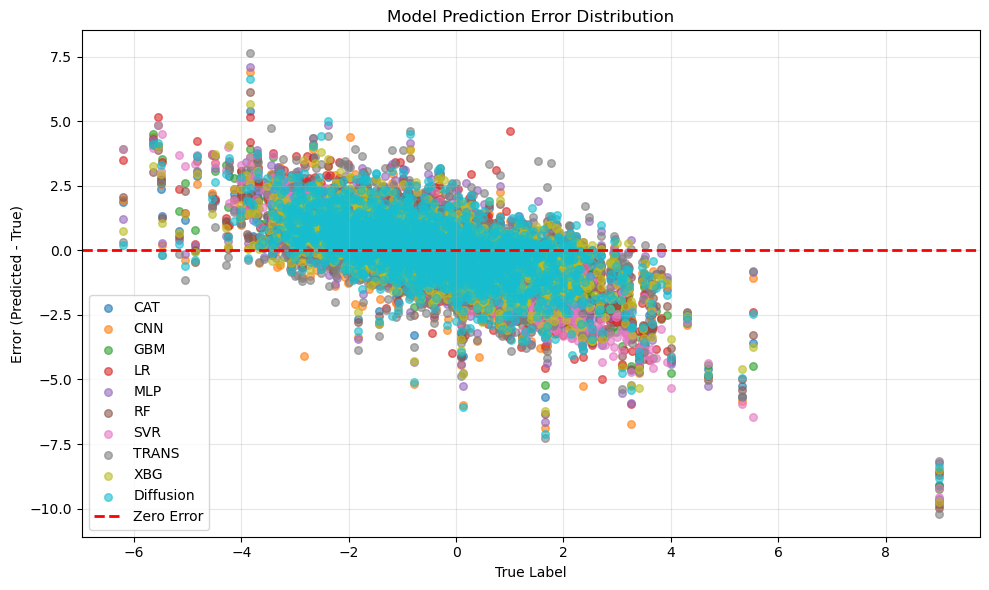

In [5]:
# Calculate the prediction errors
test_with_pred= data_with_pred.copy().loc[index_info['test_index'],:]
train_with_pred= data_with_pred.copy().loc[index_info['train_index'],:]
plt.figure(figsize=(10, 6))
for col in model_list:
    plt.scatter(test_with_pred['label'], test_with_pred[col+"_error"], alpha=0.6, s=30,label=col)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
plt.xlabel('True Label')
plt.ylabel('Error (Predicted - True)')
plt.title('Model Prediction Error Distribution')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("./plot/"+"error_label_All.svg")
plt.savefig("./plot/"+"error_label_All.png",dpi=600)
plt.show()
# index_info


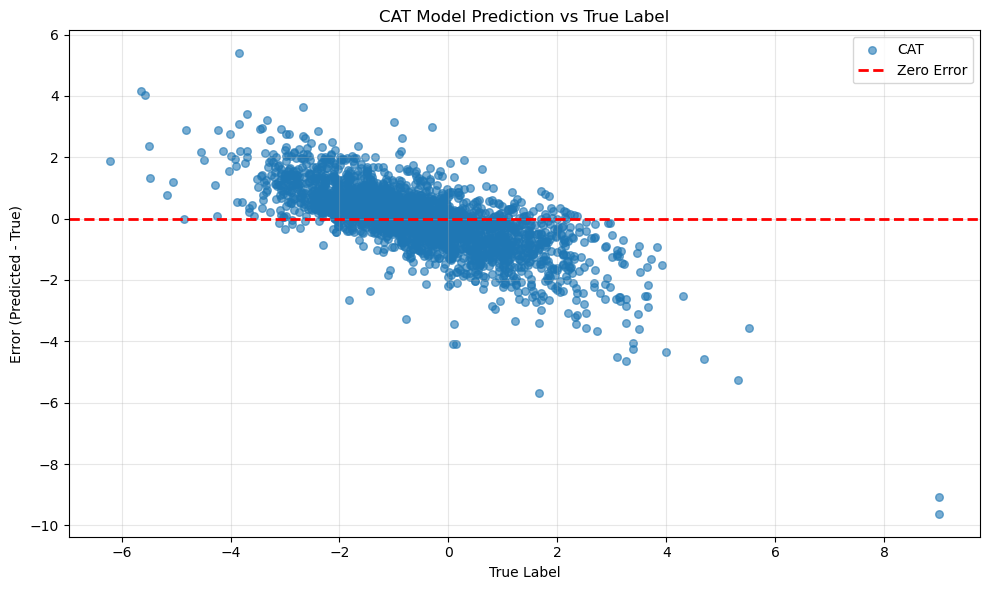

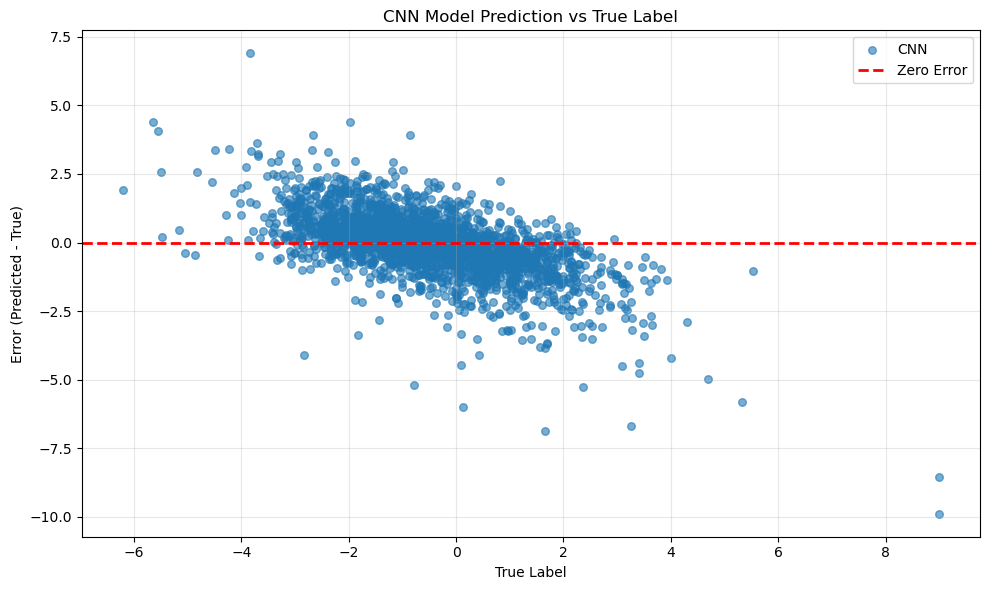

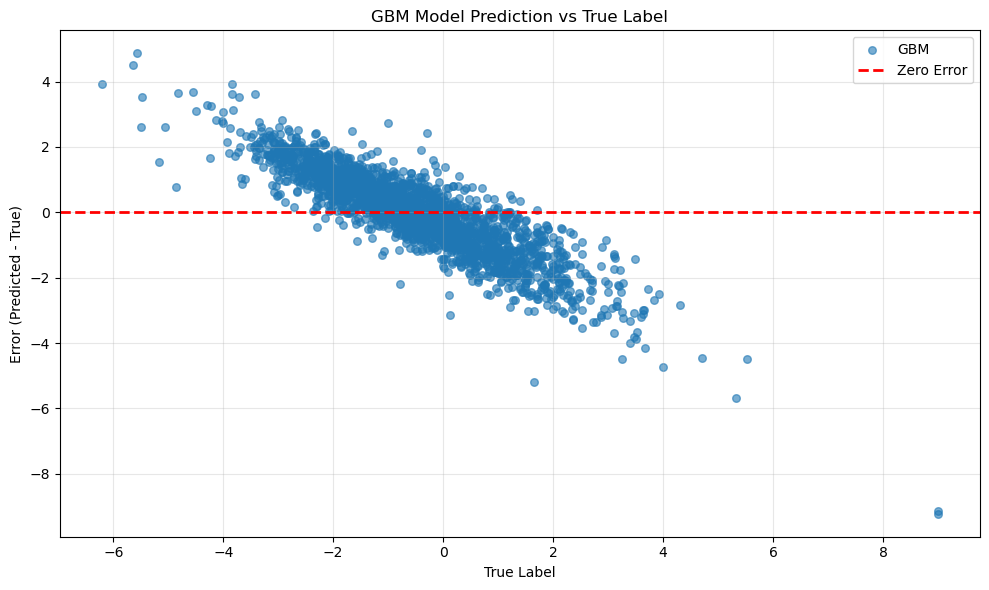

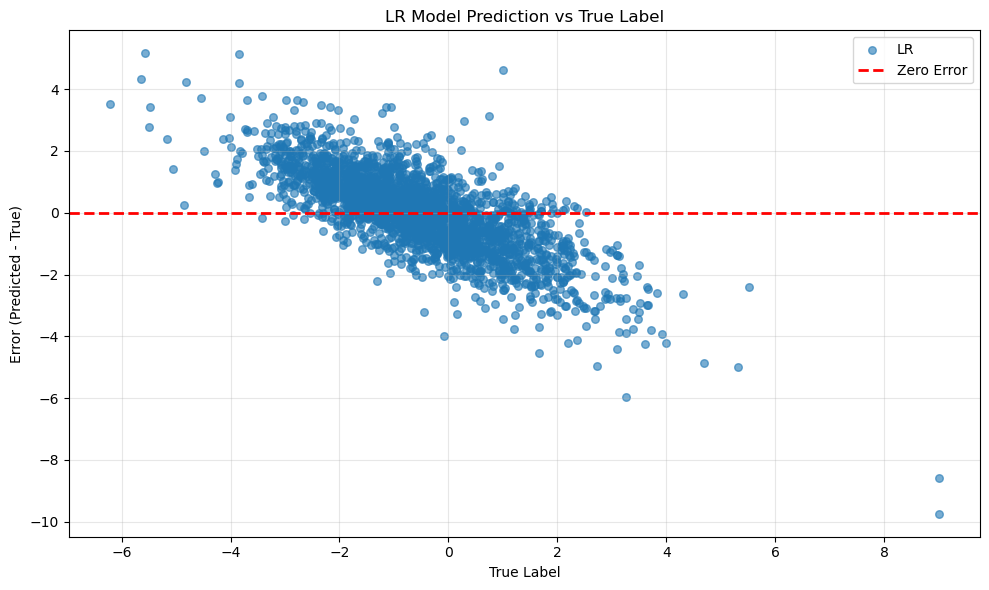

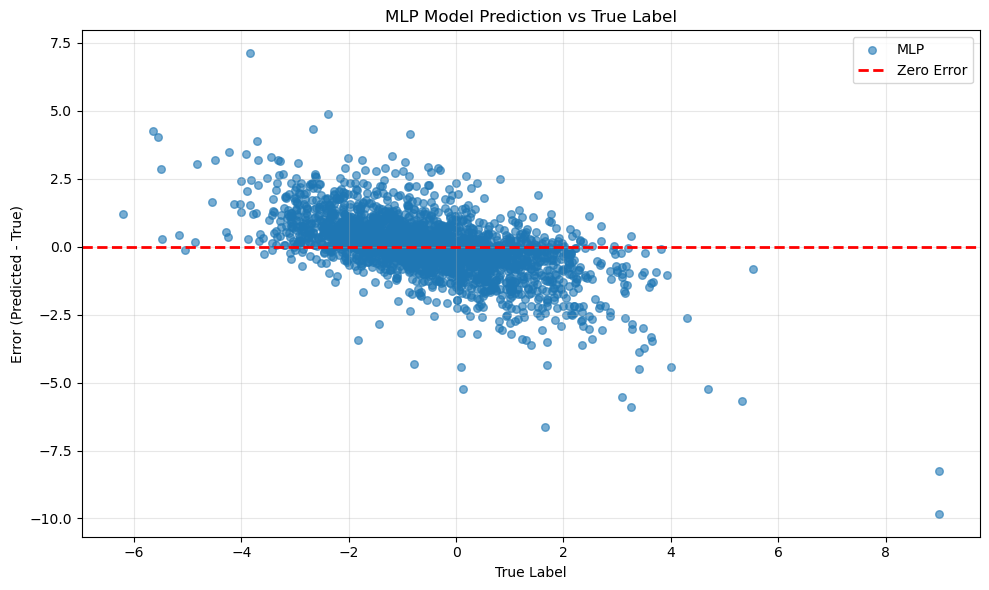

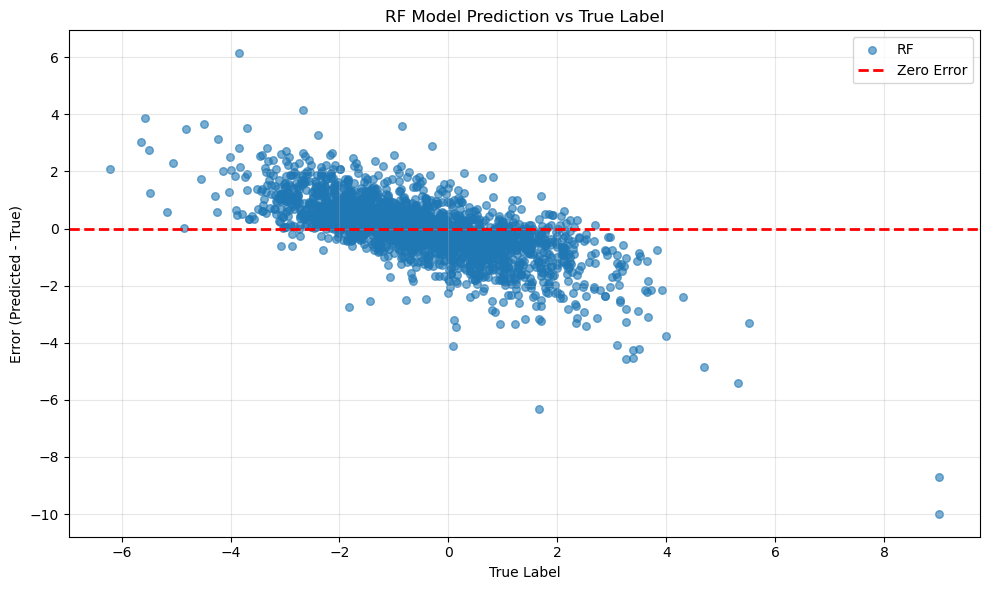

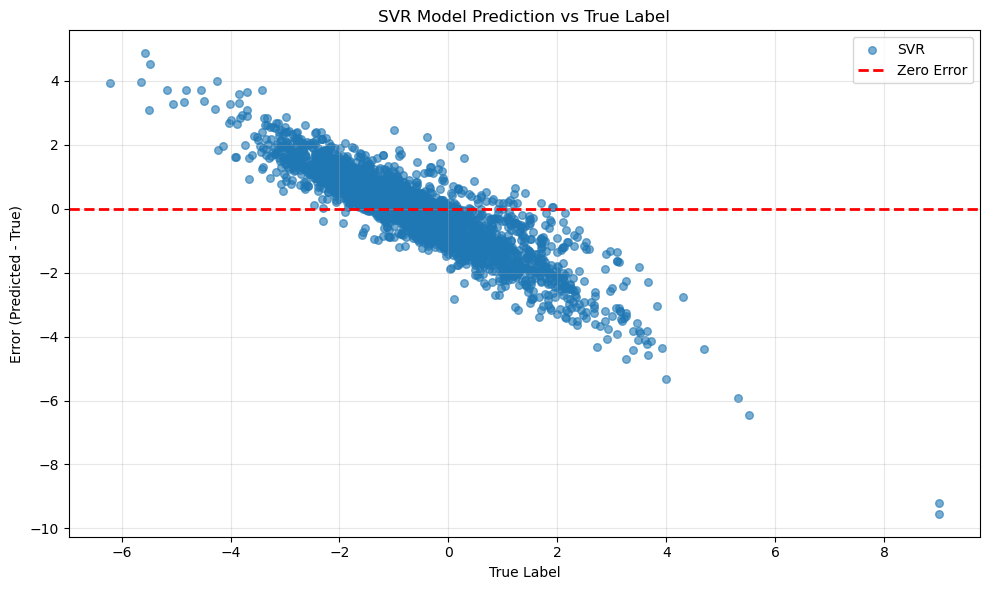

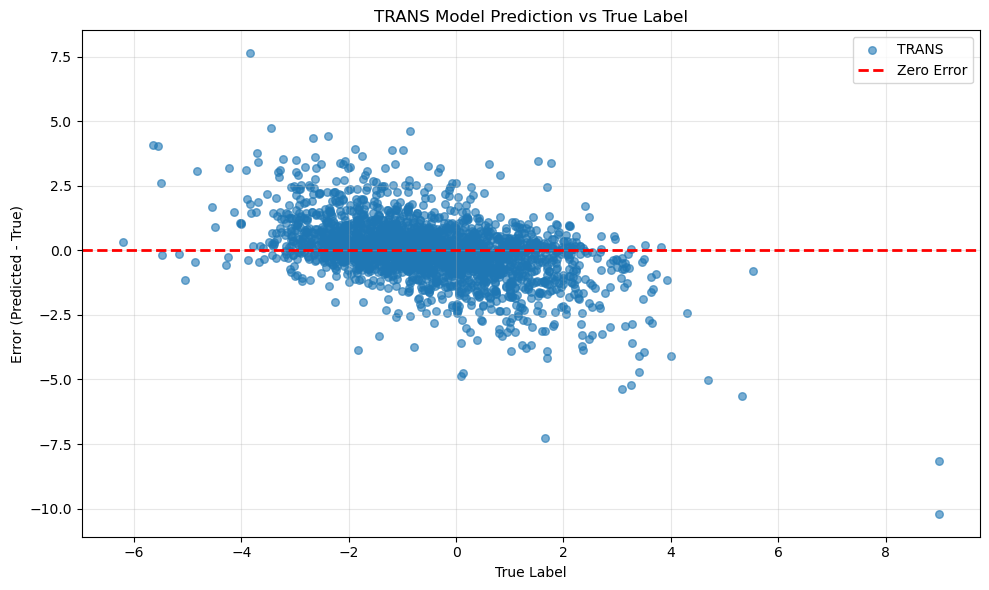

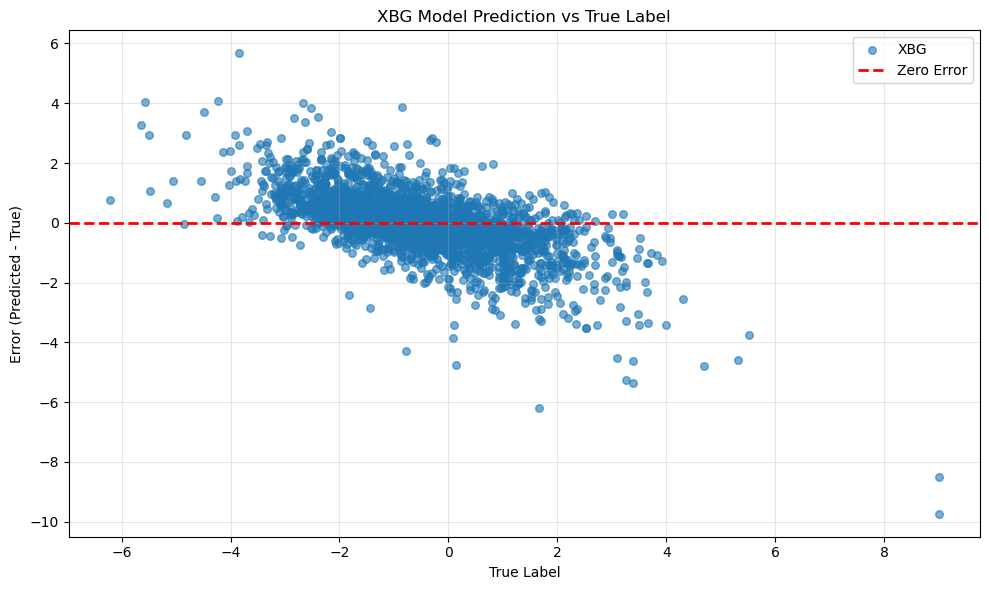

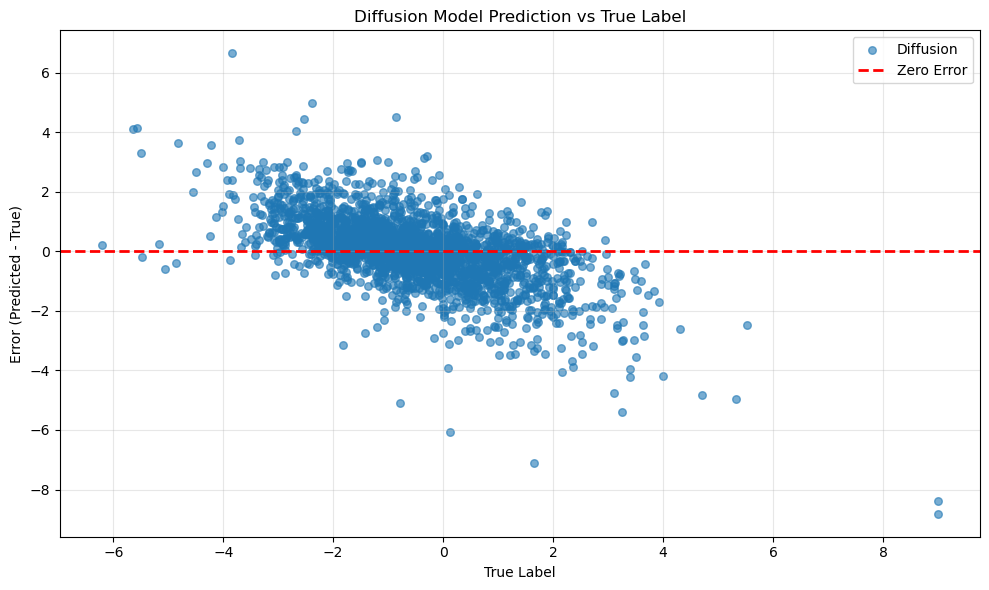

In [6]:
from sklearn.linear_model import LinearRegression

calibrator_error = dict()
calibrator_error_coff={"slope": dict(), "intercept": dict()}
for col in model_list:
    # calibrator_error[col] = LinearRegression()
    # X = train_with_pred["label"].values.reshape(-1, 1)
    # y = train_with_pred[col + "_error"].values.reshape(-1, 1)
    # calibrator_error[col].fit(X, y)

    plt.figure(figsize=(10, 6))
    plt.scatter(
        test_with_pred["label"],
        test_with_pred[col + "_error"],
        alpha=0.6,
        s=30,
        label=col,
    )
    plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Error")
    # plt.plot(
    #     np.linspace(-7, 10, 10),
    #     calibrator_error[col].predict(np.linspace(-7, 10, 10).reshape(-1, 1)),
    #     label="Calibrated Prediction",
    #     color="green",
    #     linewidth=2,
    # )
    
    # get the slope and intercept of the linear regression
    # calibrator_error_coff["slope"][col] = calibrator_error[col].coef_[0][0]
    # calibrator_error_coff["intercept"][col] = calibrator_error[col].intercept_[0]
    
    # add the slope and intercept to the plot
    # plt.text(0.05, 0.95, f'Slope: {calibrator_error_coff["slope"][col]:.4f}\nIntercept: {calibrator_error_coff["intercept"][col]:.4f}', 
    #          transform=plt.gca().transAxes, 
    #          bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
    #          verticalalignment='top', fontsize=12)
    
    plt.xlabel("True Label")
    plt.ylabel('Error (Predicted - True)')
    plt.title(col + " Model Prediction vs True Label")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig("./plot/" + "error_label_" + col + ".svg")
    plt.savefig("./plot/" + "error_label_" + col + ".png", dpi=600)
    plt.show()
    
    # print the slope and intercept
    # print(f"{col} Model - Slope: {calibrator_error_coff["slope"][col]:.4f}, Intercept: {calibrator_error_coff["intercept"][col]:.4f}")

In [7]:
print("Calibration coefficients:")
calibrator_error_coff

Calibration coefficients:


{'slope': {}, 'intercept': {}}

## pred_label plot

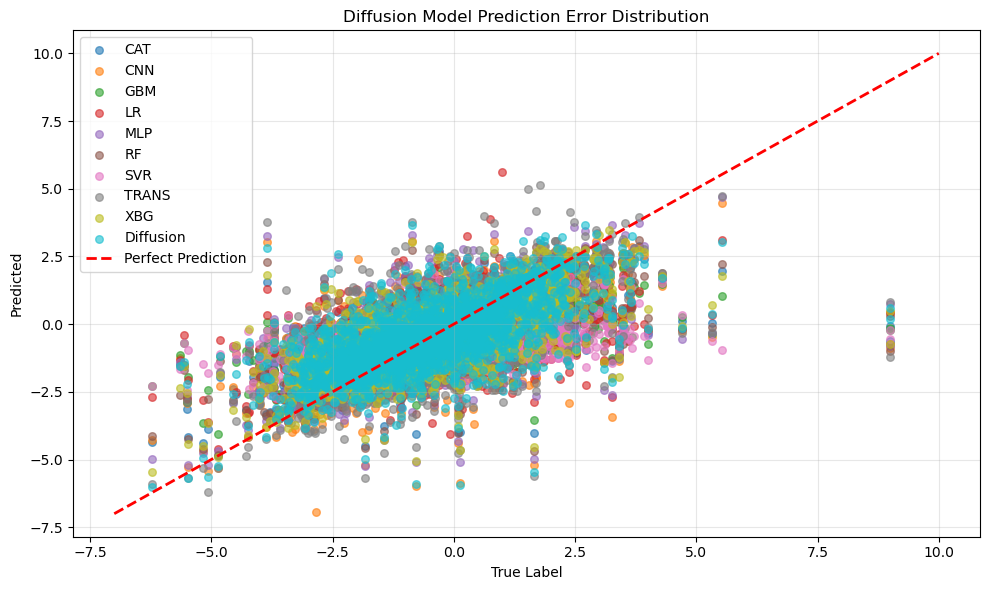

In [8]:

plt.figure(figsize=(10, 6))
for col in model_list:
    plt.scatter(test_with_pred['label'], test_with_pred[col+"_pred"], alpha=0.6, s=30,label=col)
plt.plot([-7, 10], [-7, 10], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('True Label')
plt.ylabel('Predicted')
plt.title(col+' Model Prediction Error Distribution')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("./plot/"+"pred_label_"+"All"+".svg")
plt.savefig("./plot/"+"pred_label_"+"All"+".png", dpi=600)
plt.show()

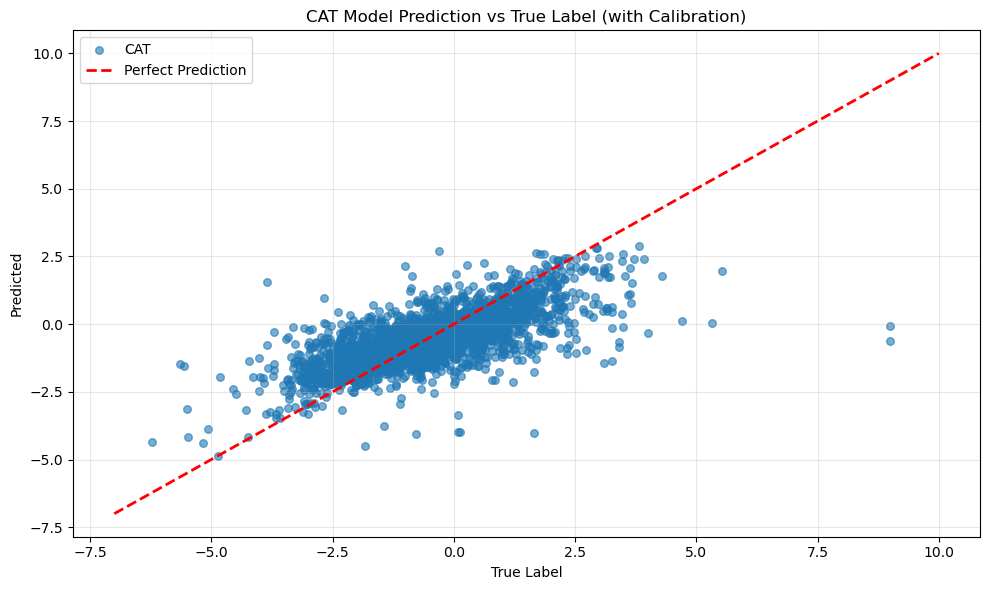

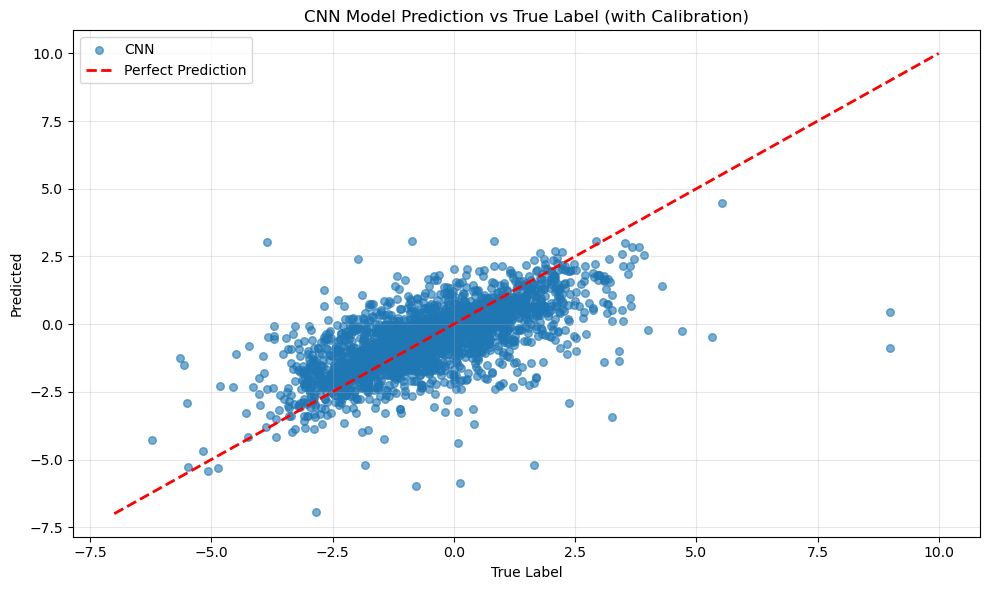

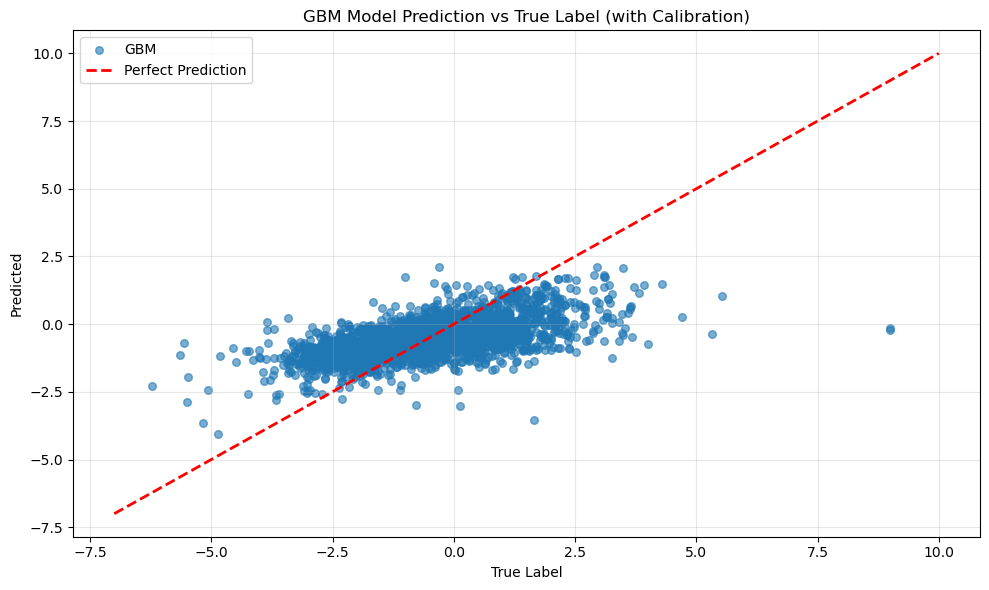

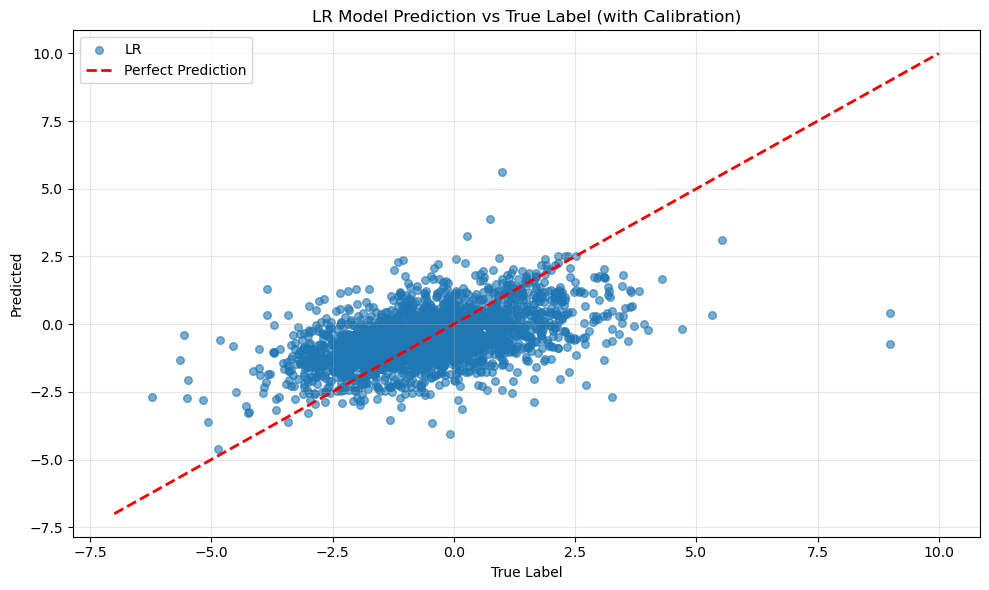

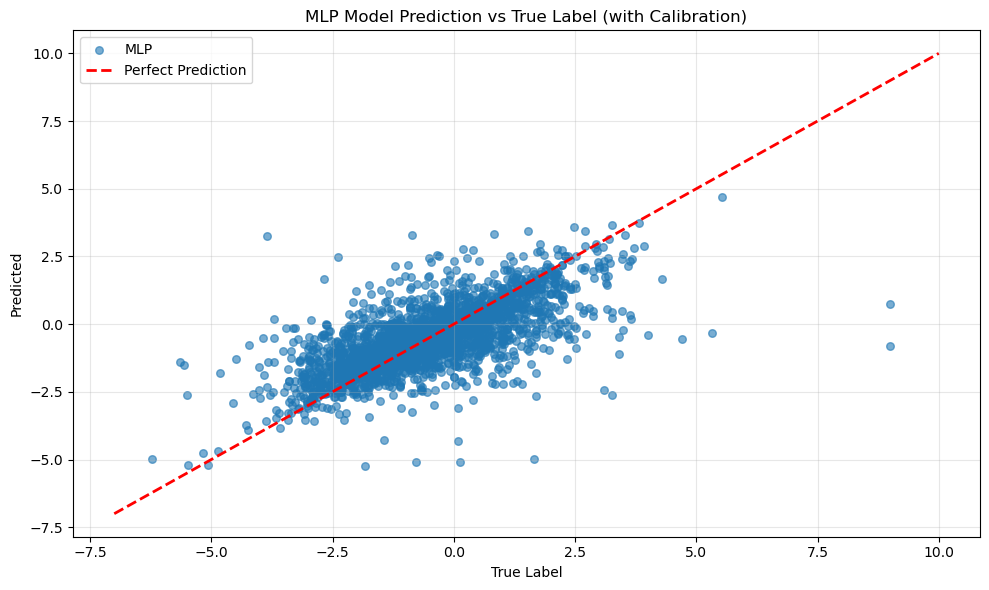

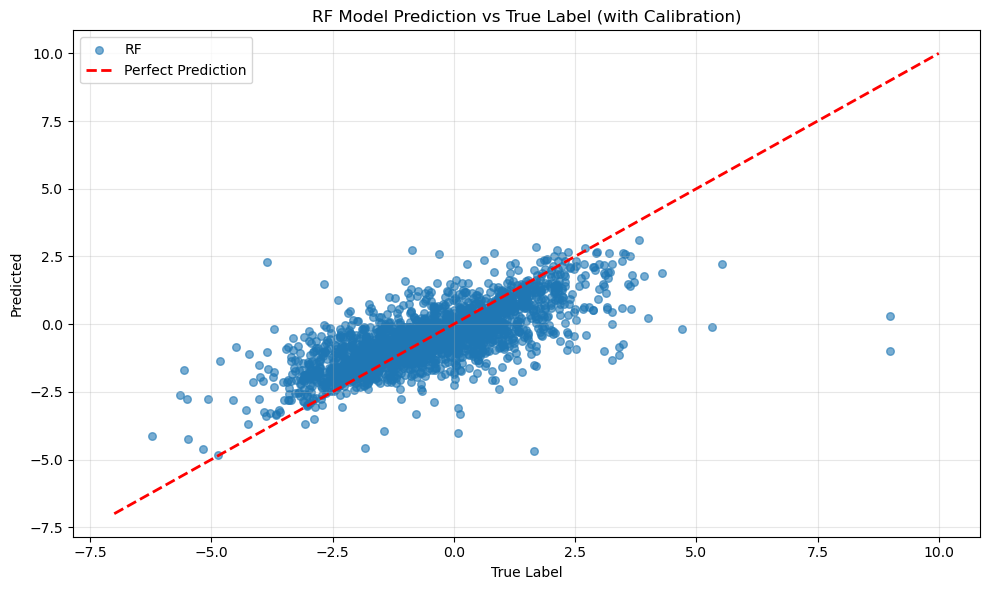

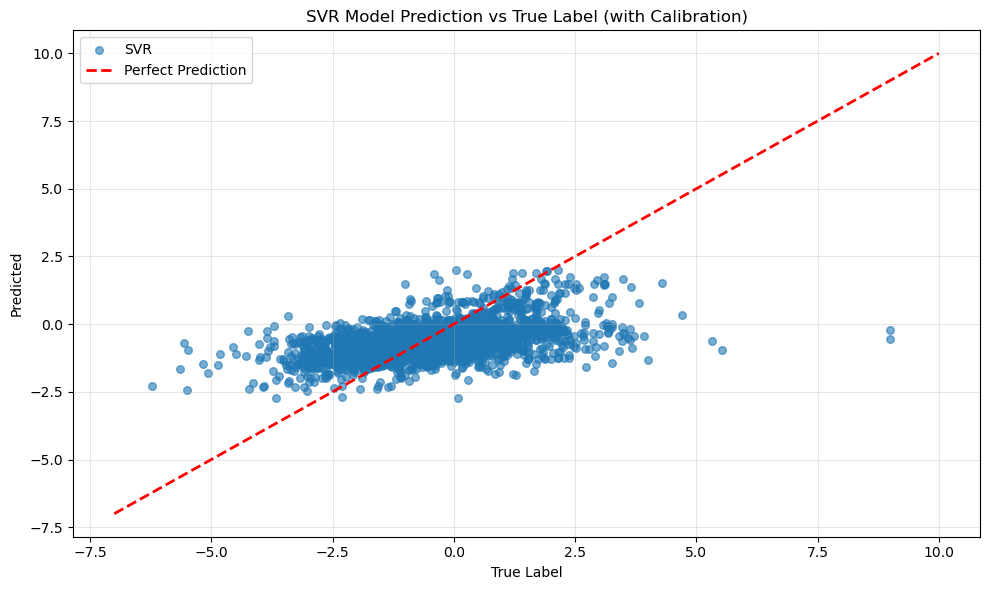

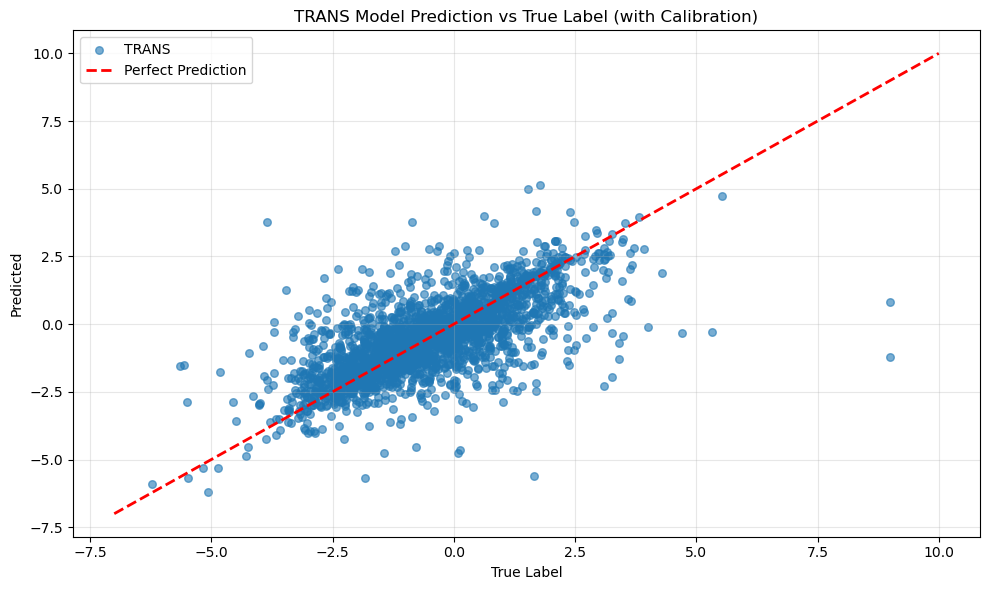

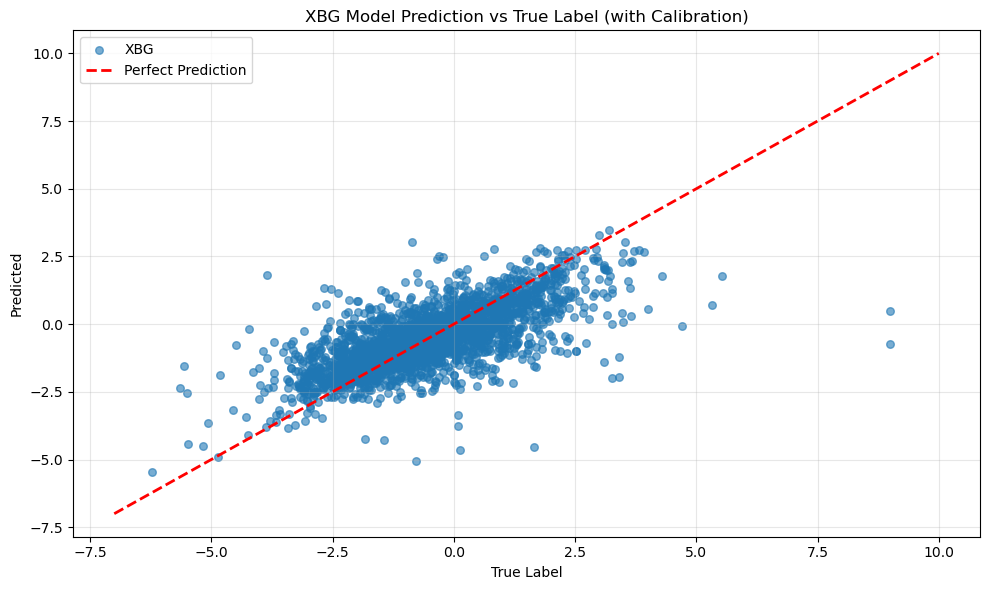

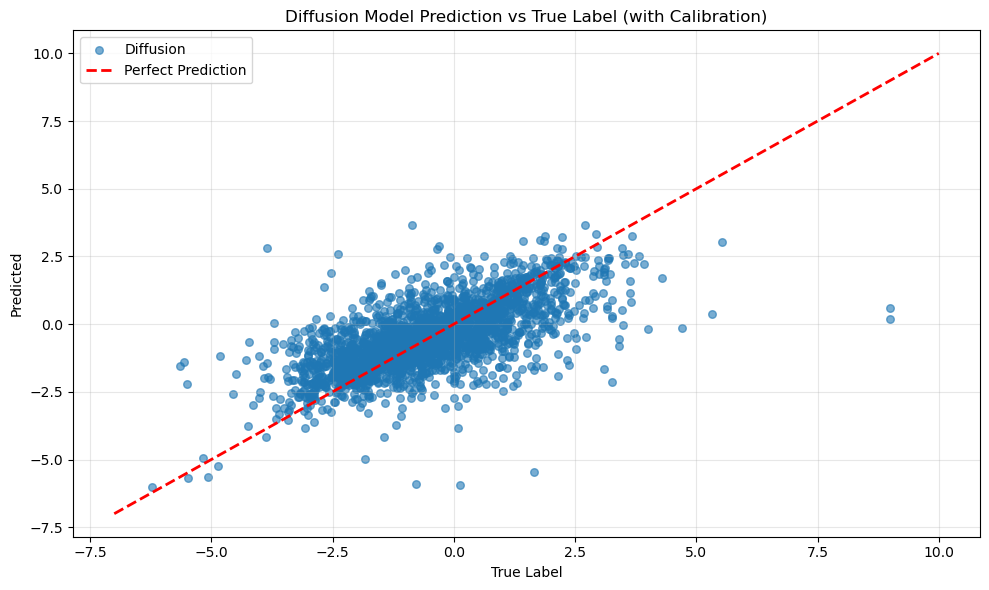

In [9]:
calibrator_pred = dict()
calibrator_pred_coff={"slope": dict(), "intercept": dict()}
for col in model_list:
    # train a linear regression model to calibrate the predictions
    # calibrator_pred[col] = LinearRegression()
    # X = test_with_pred[col+"_pred"].values.reshape(-1, 1)
    # y = test_with_pred["label"].values.reshape(-1, 1)
    # calibrator_pred[col].fit(X, y)
    
    # get the slope and intercept of the linear regression
    # calibrator_pred_coff["slope"][col] = calibrator_pred[col].coef_[0][0]
    # calibrator_pred_coff["intercept"][col] = calibrator_pred[col].intercept_[0]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(test_with_pred['label'], test_with_pred[col+"_pred"], alpha=0.6, s=30, label=col)
    plt.plot([-7, 10], [-7, 10], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
    
    # plot the calibration line
    # pred_range = np.linspace(test_with_pred[col+"_pred"].min(), test_with_pred[col+"_pred"].max(), 100)
    # calibrated_pred = calibrator_pred[col].predict(pred_range.reshape(-1, 1))
    # plt.plot(calibrated_pred, pred_range, color='green', linewidth=2, label='Calibration Line')
    
    # add the slope and intercept to the plot
    # plt.text(0.05, 0.95, f'Slope: {calibrator_pred_coff["slope"][col]:.4f}\nIntercept: {calibrator_pred_coff["intercept"][col]:.4f}', 
    #          transform=plt.gca().transAxes, 
    #          bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
    #          verticalalignment='top', fontsize=12)
    
    plt.xlabel('True Label')
    plt.ylabel('Predicted')
    plt.title(col+' Model Prediction vs True Label (with Calibration)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig("./plot/"+"pred_label_"+col+".svg")
    plt.savefig("./plot/"+"pred_label_"+col+".png", dpi=600)
    plt.show()
    
    # print the slope and intercept
    # print(f"{col} Model - Slope: {calibrator_pred_coff['slope'][col]:.4f}, Intercept: {calibrator_pred_coff['intercept'][col]:.4f}")

In [10]:
calibrator_error_coff

{'slope': {}, 'intercept': {}}

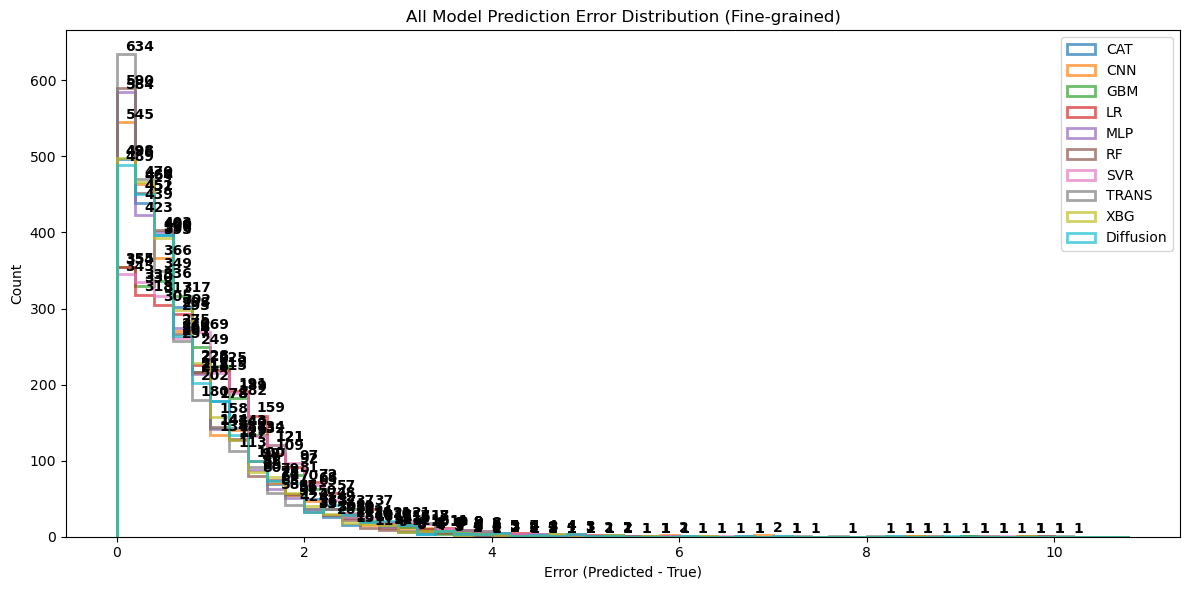

In [11]:
# create a fine-grained error distribution plot for CAT model
plt.figure(figsize=(12, 6))
for i in model_list:
    counts, bins, patches=plt.hist(np.abs(test_with_pred[i+"_error"]), bins=np.arange(0, 11, 0.2), histtype="step",label=i, alpha=0.7, linewidth=2)
    for j, count in enumerate(counts):
        if count > 0:
            plt.text(bins[j] + 0.25, count + 0.5, str(int(count)), 
                    ha='center', va='bottom', fontweight='bold')
plt.xlabel('Error (Predicted - True)')
plt.ylabel('Count')
plt.title('All Model Prediction Error Distribution (Fine-grained)')
plt.legend()
# shoew the counts on top of the bars



plt.tight_layout()
plt.savefig("./plot/"+"error_distribution_"+"All"+".svg")
plt.savefig("./plot/"+"error_distribution_"+"All"+".png", dpi=600)
plt.show()

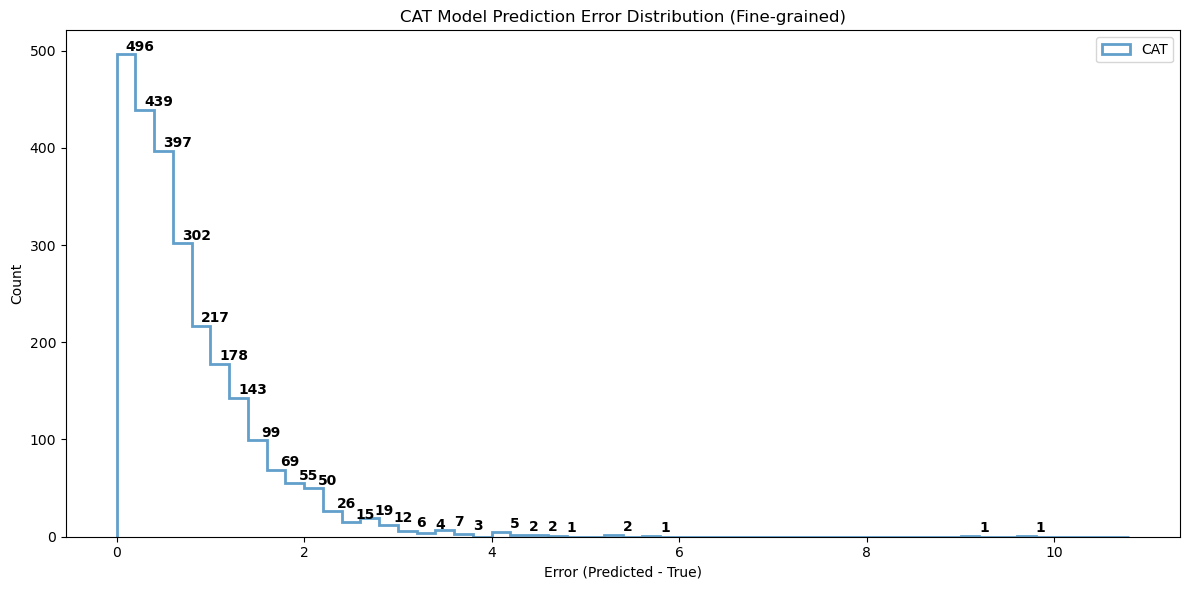

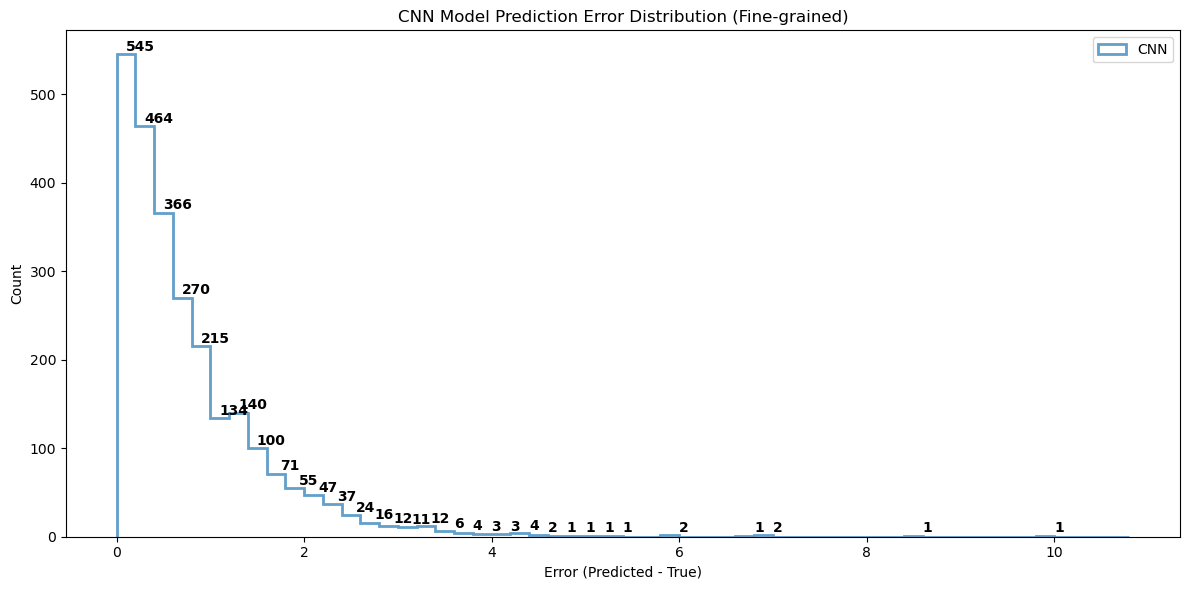

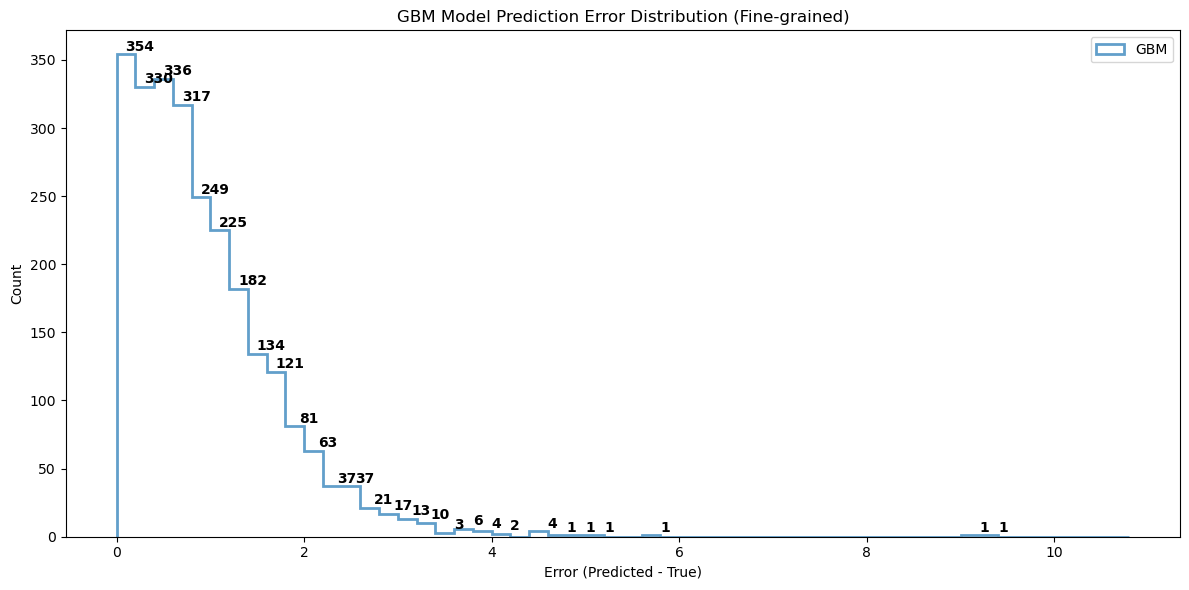

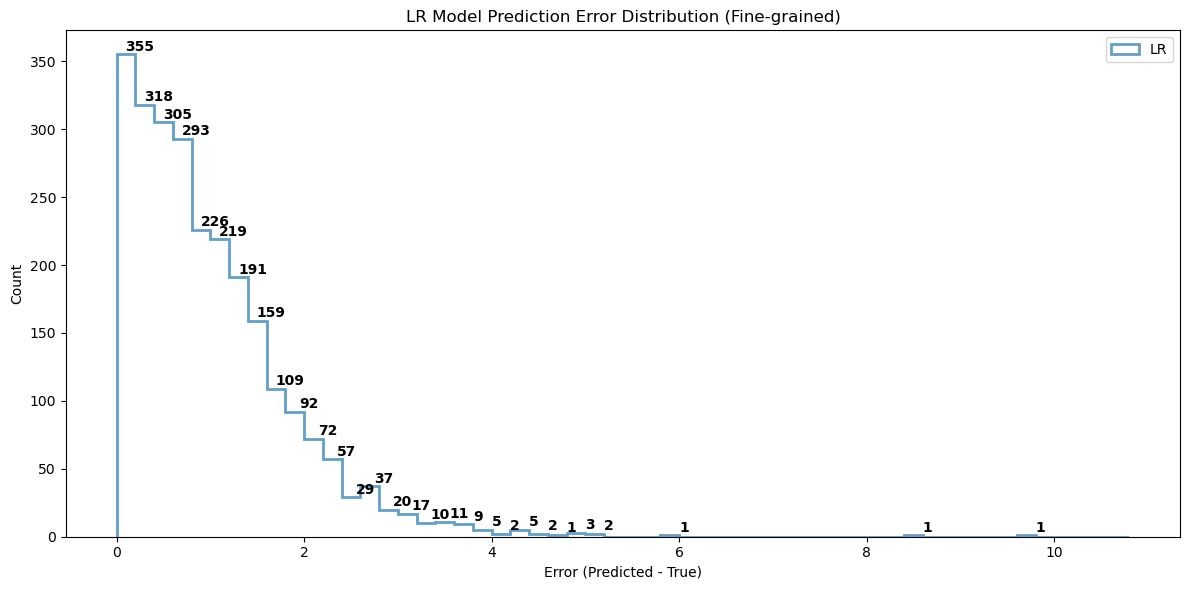

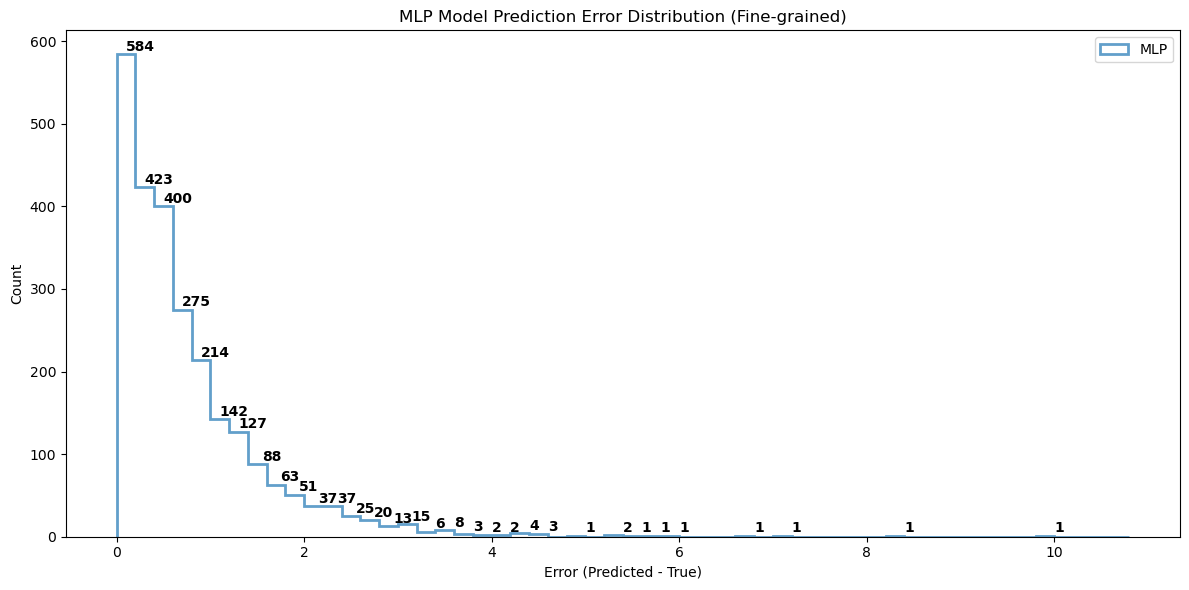

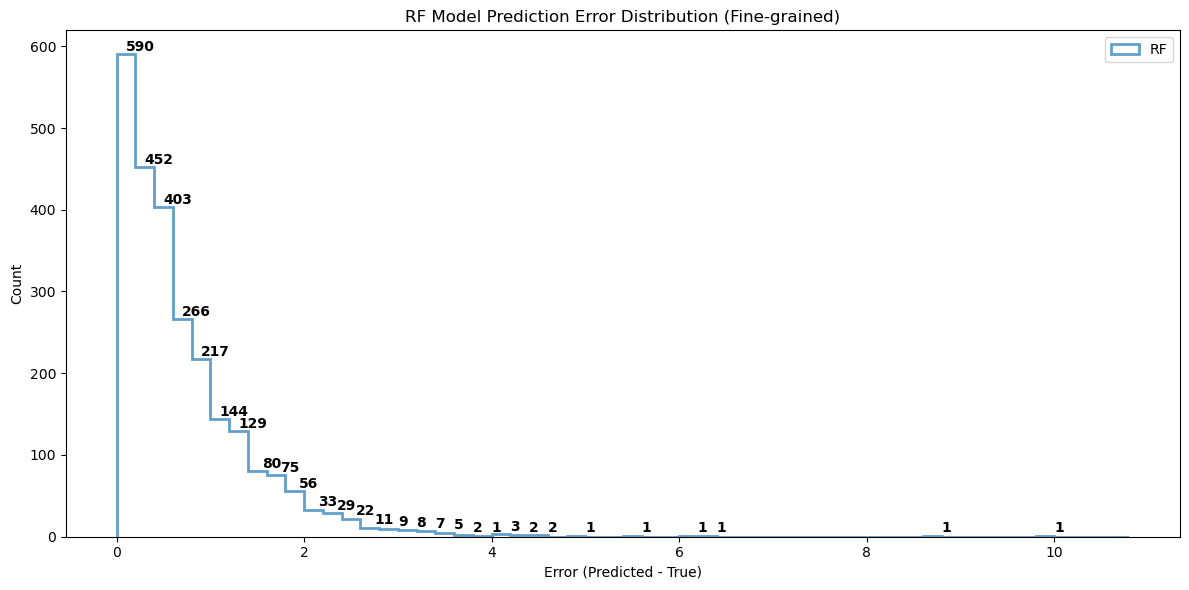

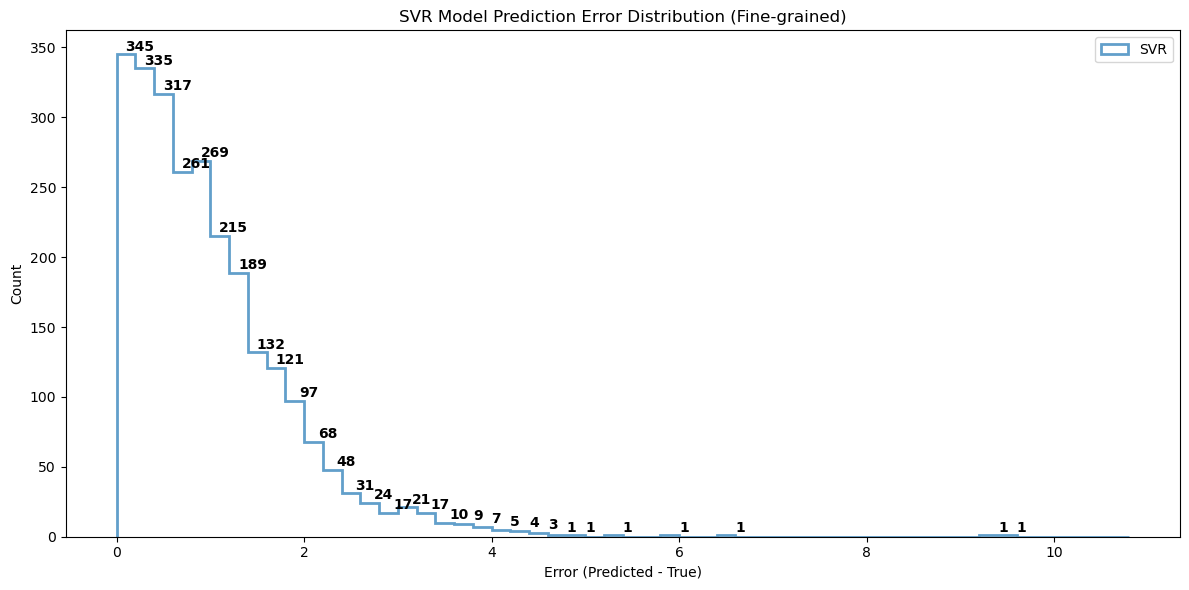

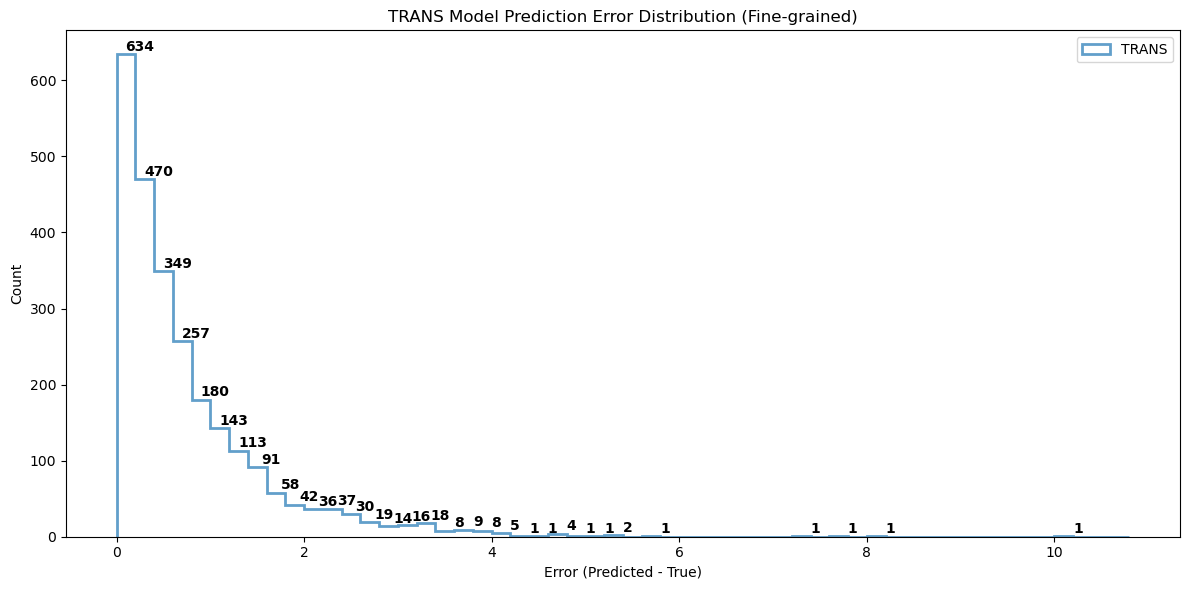

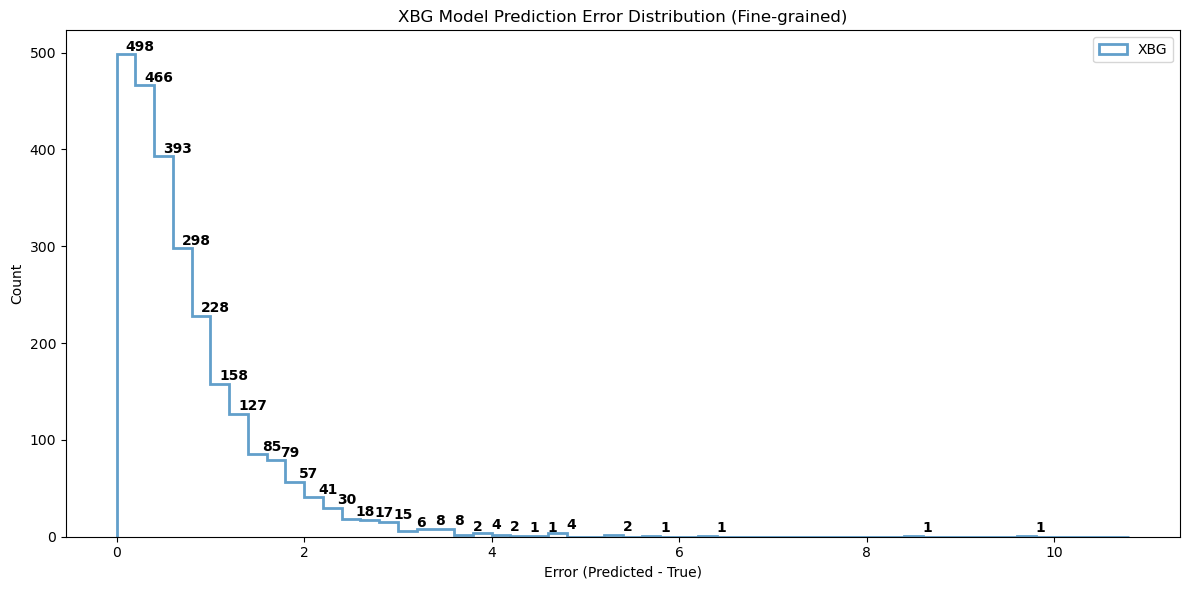

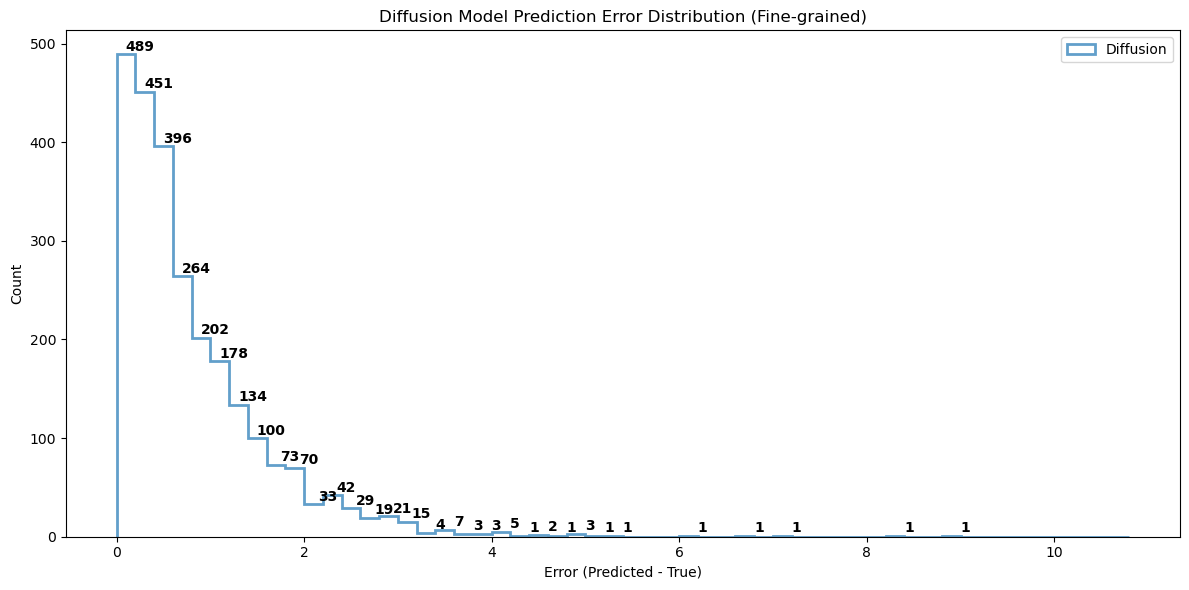

In [12]:
# create a fine-grained error distribution plot for CAT model
for i in model_list:
    plt.figure(figsize=(12, 6))
    counts, bins, patches=plt.hist(np.abs(test_with_pred[i+"_error"]), bins=np.arange(0, 11, 0.2), histtype="step",label=i, alpha=0.7, linewidth=2)
    for j, count in enumerate(counts):
        if count > 0:
            plt.text(bins[j] + 0.25, count + 0.5, str(int(count)), 
                    ha='center', va='bottom', fontweight='bold')
    plt.xlabel('Error (Predicted - True)')
    plt.ylabel('Count')
    plt.title(i+' Model Prediction Error Distribution (Fine-grained)')
    plt.legend()
    plt.tight_layout()
    plt.savefig("./plot/"+"error_distribution_"+i+".svg")
    plt.savefig("./plot/"+"error_distribution_"+i+".png", dpi=600)
    plt.show()
    # show the counts on top of the bars





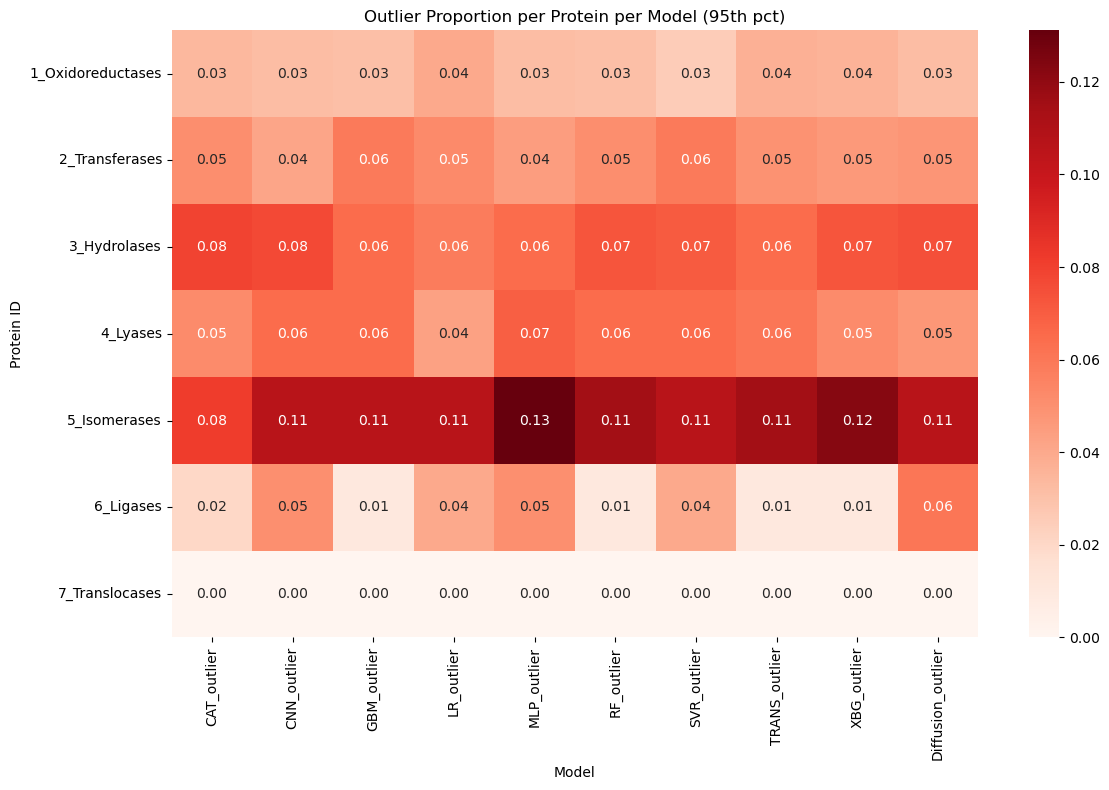

In [13]:
import seaborn as sns


df = test_with_pred.copy()

# 1) build thresholds
thresholds = {col: df[col+"_error"].abs().quantile(0.95) for col in model_list}

# 2) mark outliers
for col in model_list:
    df[col+"_outlier"] = df[col+"_error"].abs() > thresholds[col]

# 3) groupby protein_id，calculate outlier proportion
grp = df.groupby("protein_label")
outlier_cnt  = grp[[col+"_outlier" for col in model_list]].sum()
total_cnt    = grp.size().rename("total")
outlier_prop = outlier_cnt.div(total_cnt, axis=0)

# 4) heatmap
plt.figure(figsize=(12,8))
sns.heatmap(outlier_prop, annot=True, fmt=".2f", cmap="Reds")
plt.title("Outlier Proportion per Protein per Model (95th pct)")
plt.xlabel("Model")
plt.ylabel("Protein ID")
# plt.yticks(np.arange(1,8,1), np.arange(1,8,1).astype(str)+"_"+PROTEIN_TYPES_NAMES[1:], rotation=0)
plt.tight_layout()
plt.show()



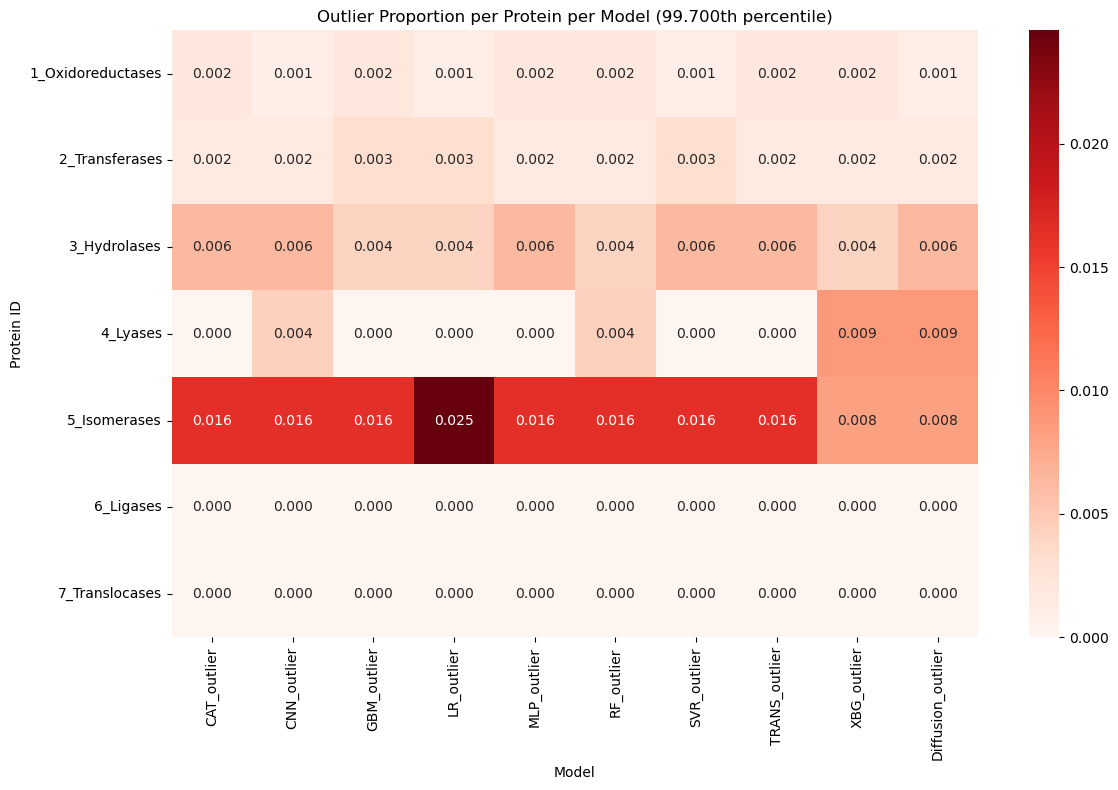

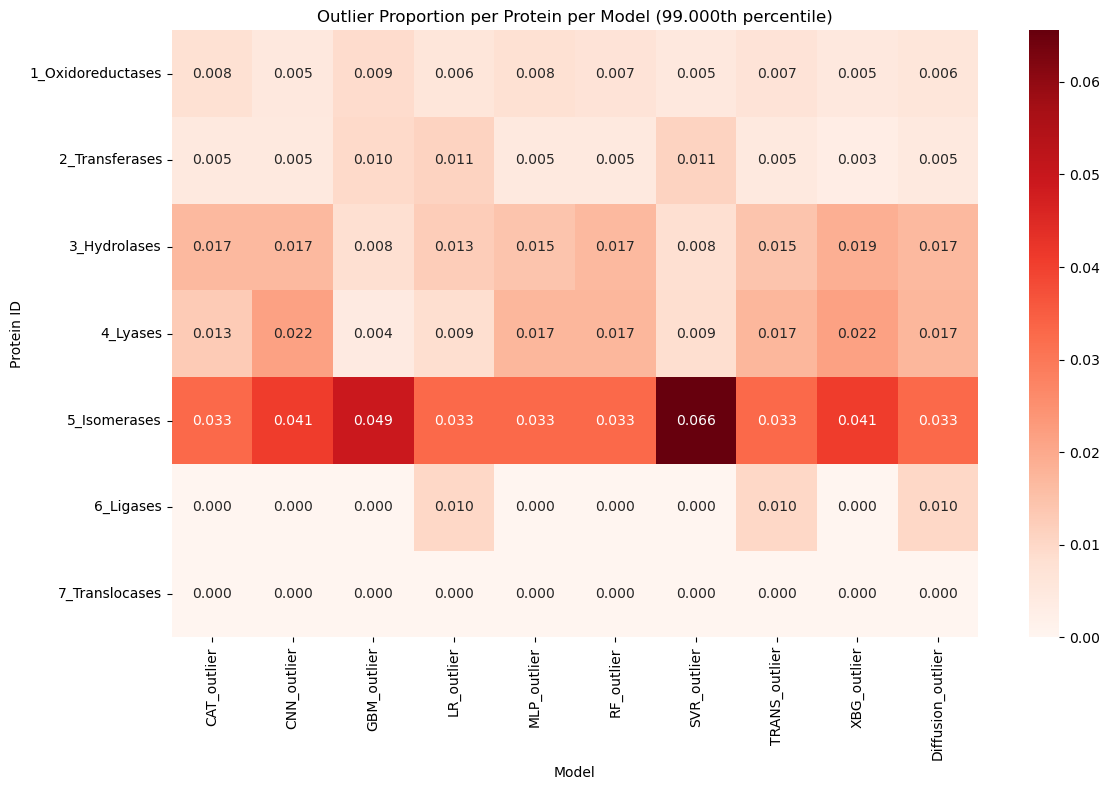

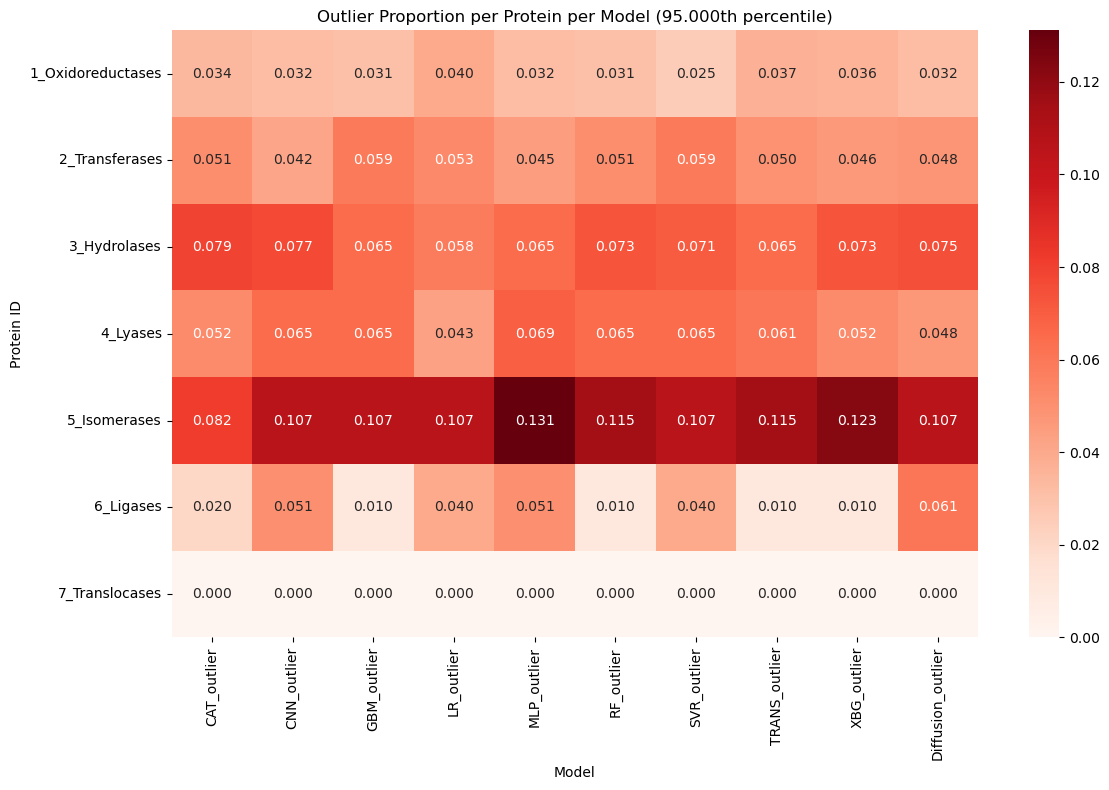

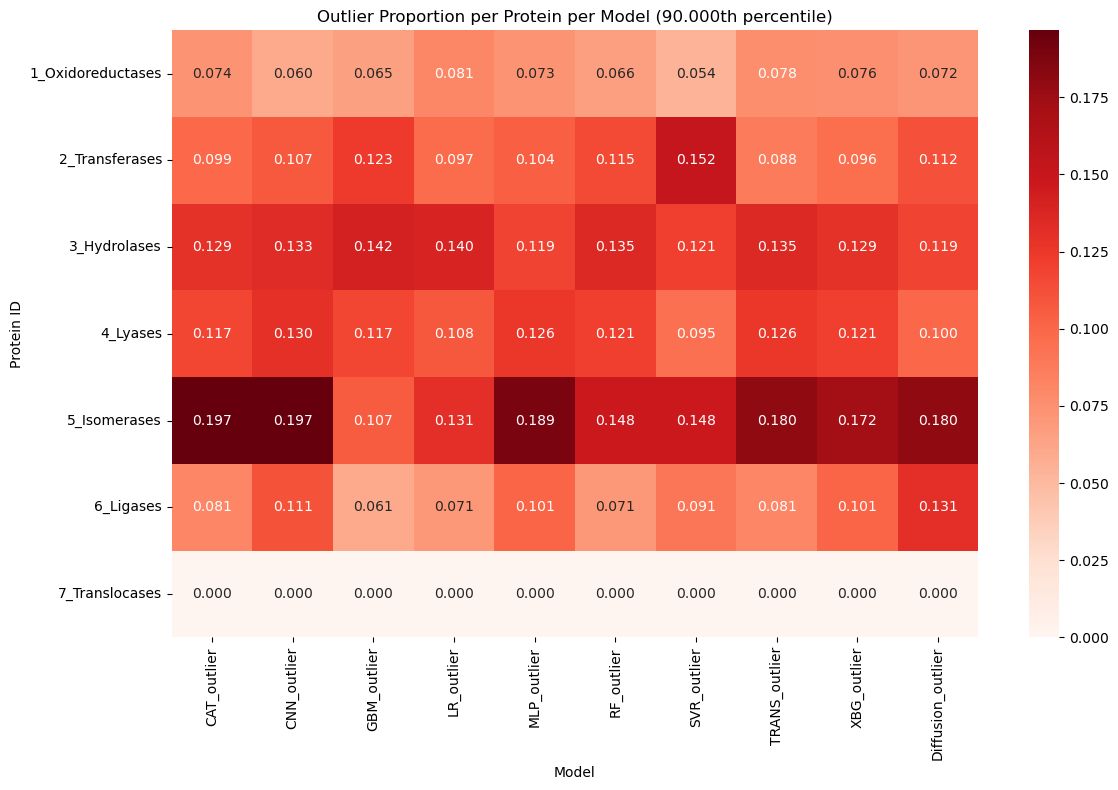

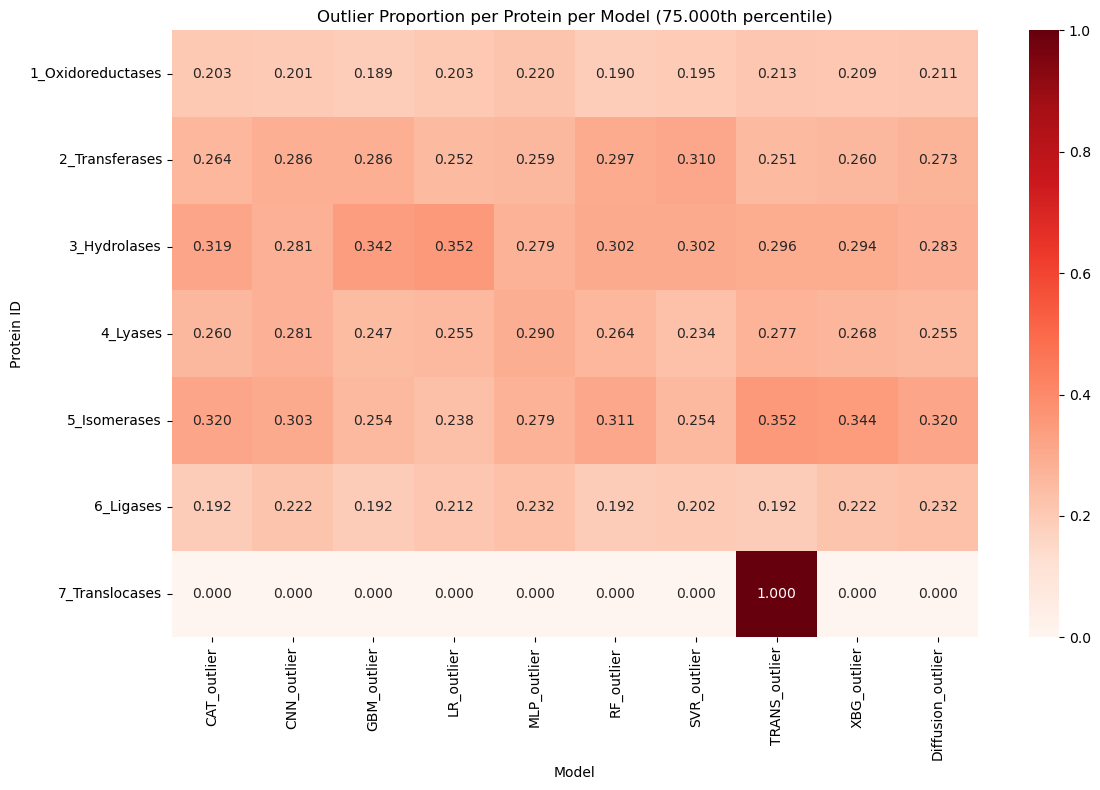

In [14]:
def analyze_outlier_by_protein(df, model_list, percentile=0.95, save_plot=True, plot_dir="./plot/",plot_save_name=None):
    """
    analyze_outlier proportion by protein and model.
    
    Parameters:
    -----------
    df : pd.DataFrame
        contains protein labels and model error predictions
    model_list : list or array
        model names list
    percentile : float, default=0.95
        custom percentile threshold for defining outliers
    save_plot : bool, default=True
        weather to save the plots
    plot_dir : str, default="./plot/"
        save directory for plots
    
    Returns:
    --------
    outlier_prop : pd.DataFrame
        each row represents a protein, each column represents a model, each value is the proportion of outliers
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # 1) build thresholds
    thresholds = {col: df[col+"_error"].abs().quantile(percentile) for col in model_list}
    
    # 2) mark outliers
    for col in model_list:
        df[col+"_outlier"] = df[col+"_error"].abs() > thresholds[col]
    
    # 3) groupby protein_id，calculate outlier proportion
    grp = df.groupby("protein_label")
    outlier_cnt = grp[[col+"_outlier" for col in model_list]].sum()
    total_cnt = grp.size().rename("total")
    outlier_prop = outlier_cnt.div(total_cnt, axis=0)
    
    # 4) plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(outlier_prop, annot=True, fmt=".3f", cmap="Reds")
    plt.title(f"Outlier Proportion per Protein per Model ({percentile*100:.3f}th percentile)")
    plt.xlabel("Model")
    plt.ylabel("Protein ID")
    plt.tight_layout()
    
    if save_plot:
        if plot_save_name is None:
            plot_save_name = f"outlier_heatmap_{percentile*100:.0f}pct.svg"
        plt.savefig(plot_dir+plot_save_name)
        plt.savefig(plot_dir+plot_save_name[:-4]+".png", dpi=600)
    plt.show()
    return outlier_prop

outlier_results = analyze_outlier_by_protein(test_with_pred, model_list, percentile=0.997, save_plot=True,plot_save_name="outlier_heatmap_997pct.svg")
outlier_results = analyze_outlier_by_protein(test_with_pred, model_list, percentile=0.99, save_plot=True)
outlier_results = analyze_outlier_by_protein(test_with_pred, model_list, percentile=0.95, save_plot=True)
outlier_results = analyze_outlier_by_protein(test_with_pred, model_list, percentile=0.90, save_plot=True)
outlier_results = analyze_outlier_by_protein(test_with_pred, model_list, percentile=0.75, save_plot=True)

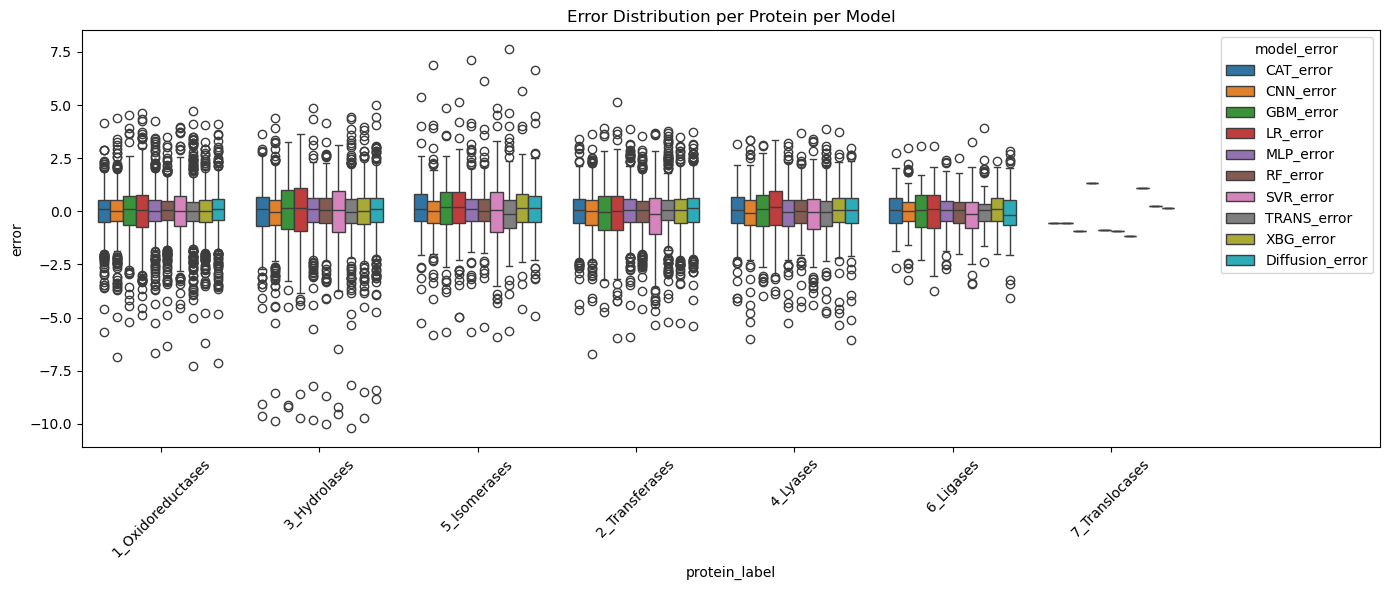

In [15]:
# 5) boxplot
melted = df.melt(
    id_vars=["protein_label"],
    value_vars=[col+"_error" for col in model_list],
    var_name="model_error",
    value_name="error",
)
plt.figure(figsize=(14,6))
sns.boxplot(data=melted, x="protein_label", y="error", hue="model_error")
plt.xticks(rotation=45)
plt.xlim(-0.5,7.7)
plt.title("Error Distribution per Protein per Model")
plt.tight_layout()
plt.savefig("./plot/error_boxplot_by_protein.svg")
plt.savefig("./plot/error_boxplot_by_protein.png", dpi=600)
plt.show()

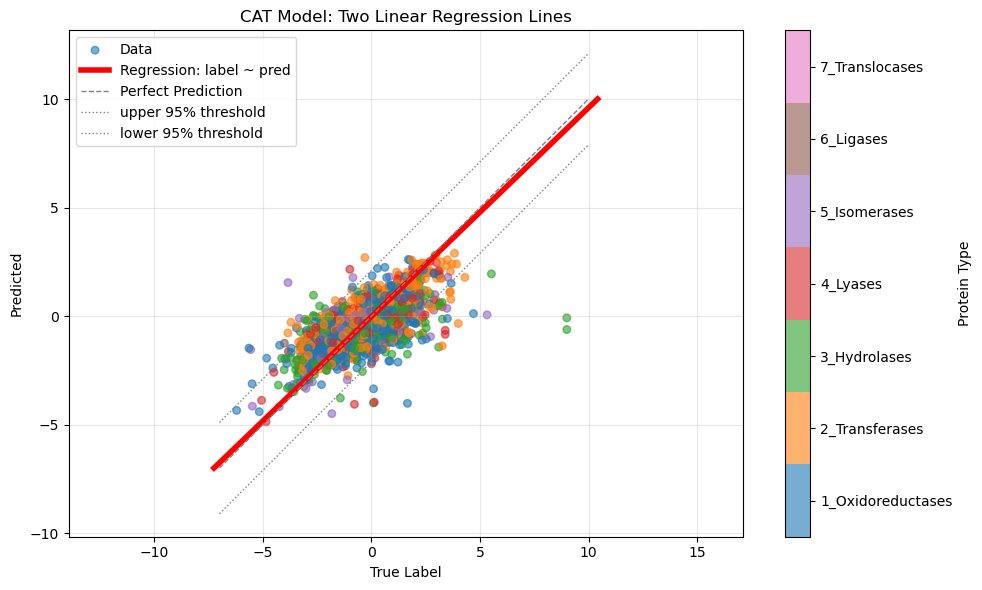

pred ~ label: slope=0.4781, intercept=-0.2888
label ~ pred: slope=1.0394, intercept=0.0228


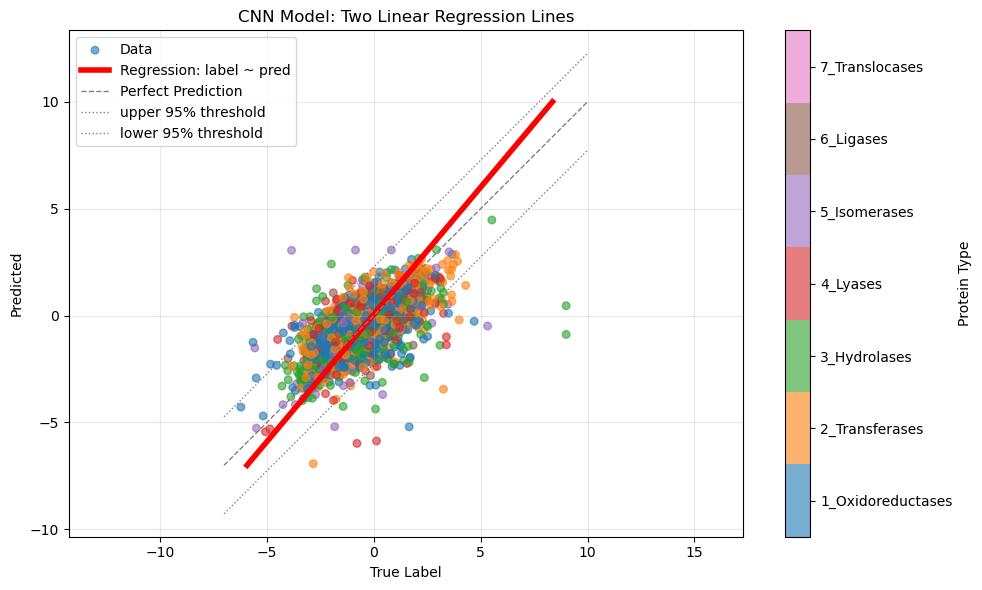

pred ~ label: slope=0.5290, intercept=-0.3124
label ~ pred: slope=0.8403, intercept=-0.0439


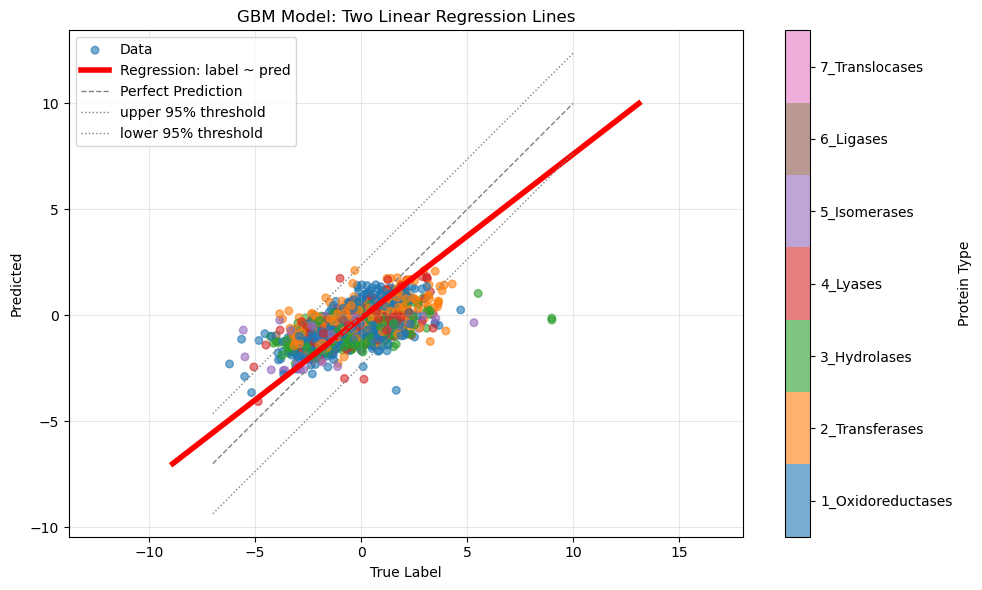

pred ~ label: slope=0.2760, intercept=-0.4026
label ~ pred: slope=1.2939, intercept=0.1664


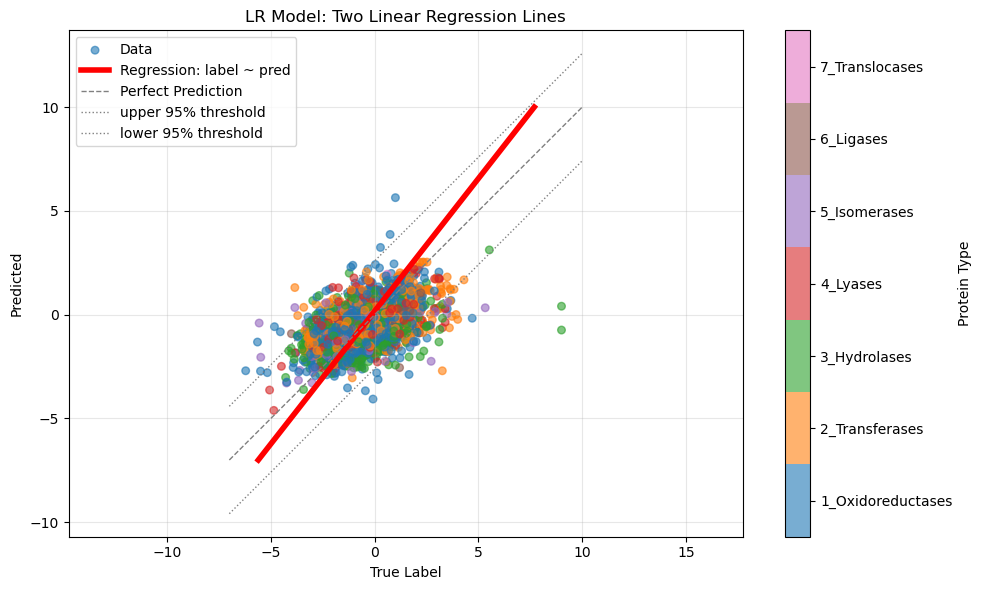

pred ~ label: slope=0.3313, intercept=-0.3550
label ~ pred: slope=0.7820, intercept=-0.1311


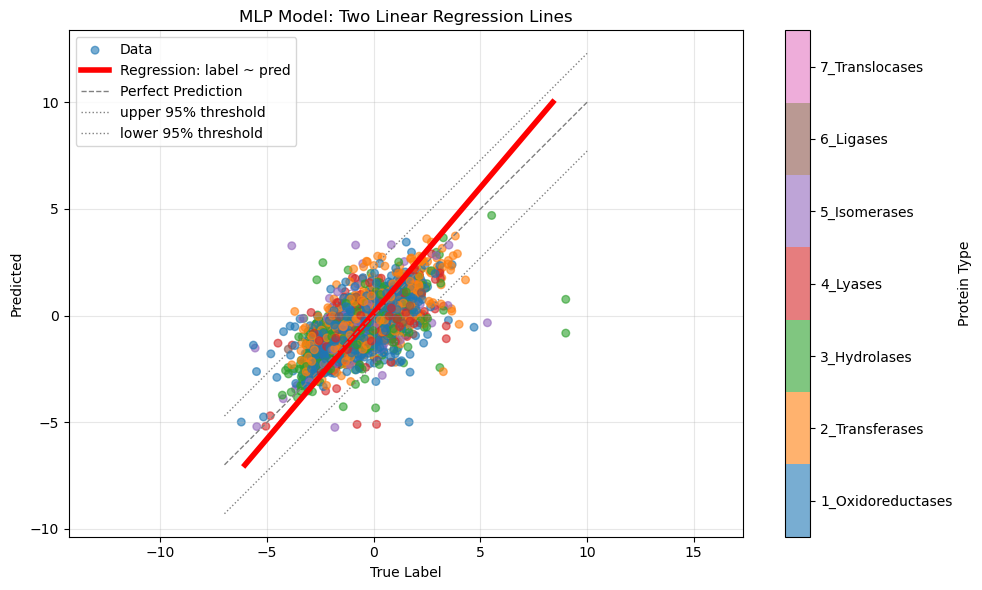

pred ~ label: slope=0.5505, intercept=-0.2305
label ~ pred: slope=0.8488, intercept=-0.0982


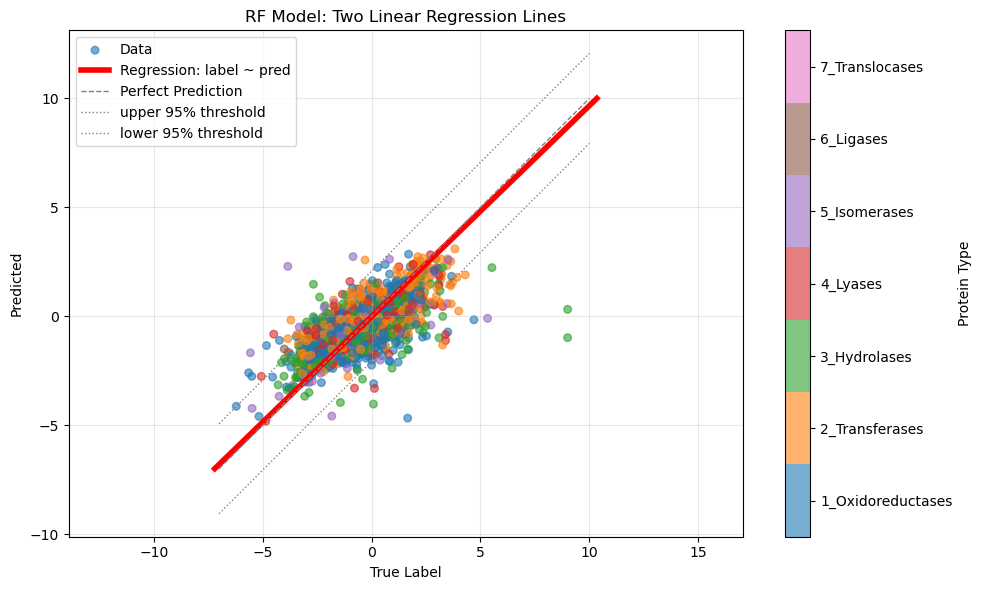

pred ~ label: slope=0.5111, intercept=-0.2744
label ~ pred: slope=1.0321, intercept=0.0225


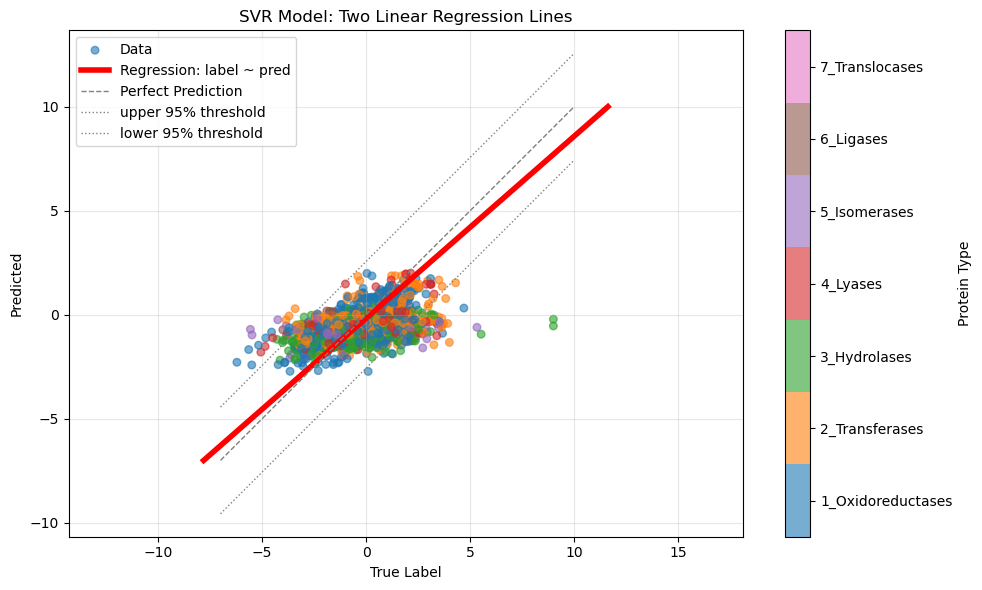

pred ~ label: slope=0.2153, intercept=-0.5313
label ~ pred: slope=1.1430, intercept=0.1914


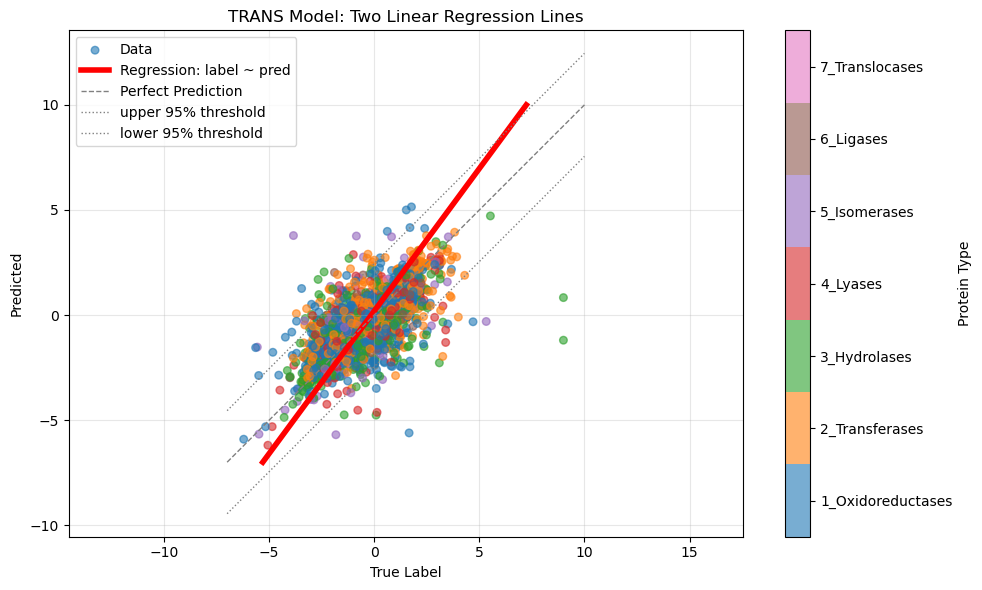

pred ~ label: slope=0.6315, intercept=-0.2073
label ~ pred: slope=0.7375, intercept=-0.1418


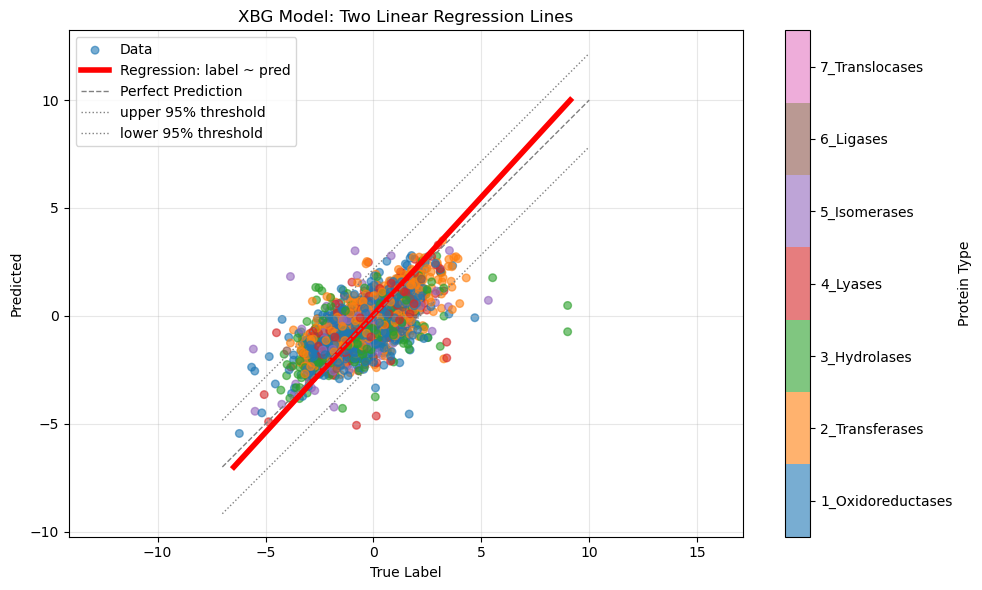

pred ~ label: slope=0.5270, intercept=-0.2587
label ~ pred: slope=0.9172, intercept=-0.0477


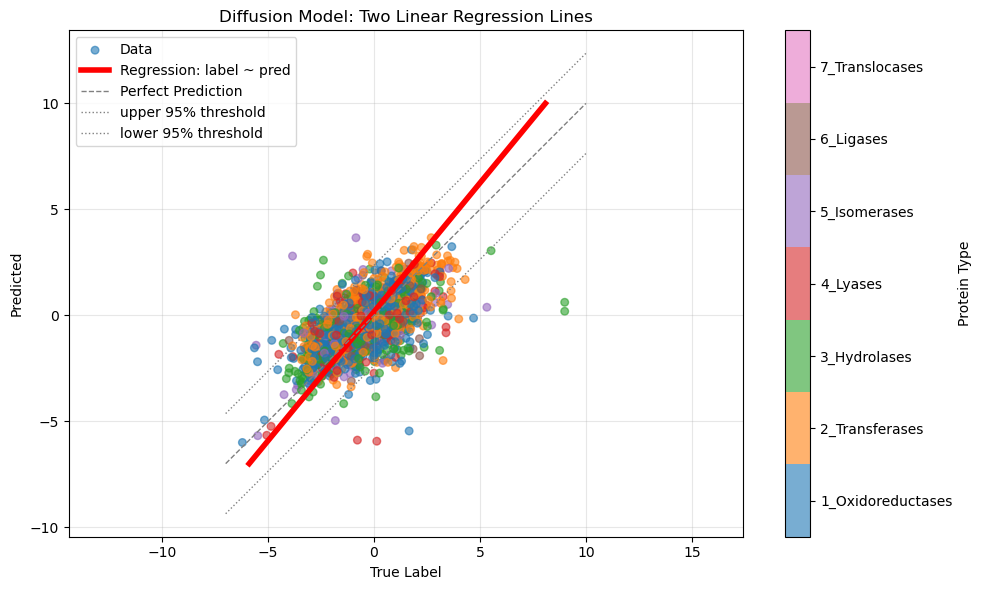

pred ~ label: slope=0.5318, intercept=-0.2132
label ~ pred: slope=0.8223, intercept=-0.1350


In [16]:
# ...existing code...
from sklearn.linear_model import LinearRegression

for col in model_list:
# col = "CAT"
    # use label as independent variable
    reg_label = LinearRegression()
    X_label = test_with_pred["label"].values.reshape(-1, 1)
    y_pred = test_with_pred[col+"_pred"].values.reshape(-1, 1)
    reg_label.fit(X_label, y_pred)

    # use pred as independent variable
    reg_pred = LinearRegression()
    X_pred = test_with_pred[col+"_pred"].values.reshape(-1, 1)
    y_label = test_with_pred["label"].values.reshape(-1, 1)
    reg_pred.fit(X_pred, y_label)

    plt.figure(figsize=(10, 6))
    # color the scatter plot by protein_id using a colormap with 7 colors
    from matplotlib.colors import ListedColormap
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
    cmap_7 = ListedColormap(colors)
    plt.axis("equal")

    # Use protein_id - 1 to map protein_id 1-7 to colormap indices 0-6
    plt.scatter(test_with_pred['label'], test_with_pred[col+"_pred"], 
            c=test_with_pred['protein_id'] - 1, 
            alpha=0.6, s=30, cmap=cmap_7, label='Data',vmin=0, vmax=7)

    # plot the regression lines using label as independent variable
    label_range = np.linspace(-7,10, 100).reshape(-1, 1)
    pred_by_label = reg_label.predict(label_range)
    # plt.plot(label_range, pred_by_label, color='green', linewidth=4, label='Regression: pred ~ label')

    # plot the regression lines using pred as independent variable
    pred_range = np.linspace(-7,10, 100).reshape(-1, 1)
    label_by_pred = reg_pred.predict(pred_range)
    plt.plot(label_by_pred, pred_range, color='red', linewidth=4, label='Regression: label ~ pred')

    plt.plot([-7, 10], [-7, 10], color='gray', linestyle='--', linewidth=1, label='Perfect Prediction')

    # plot 95% threshold line
    thresholds = {col: test_with_pred[col+"_error"].abs().quantile(0.95) for col in model_list}
    plt.plot([-7, 10], [-7+thresholds[col], 10+thresholds[col]], color='gray', linestyle=':', linewidth=1, label='upper 95% threshold')
    plt.plot([-7, 10], [-7-thresholds[col], 10-thresholds[col]], color='gray', linestyle=':', linewidth=1, label='lower 95% threshold')

    # add a colorbar for protein_id with proper ordering
    cbar = plt.colorbar()
    cbar.set_label('Protein Type')
    # Set ticks at the center of each color segment (0.5, 1.5, 2.5, ..., 6.5)
    # This corresponds to protein_id 1-7 positioned at the center of their respective colors
    cbar.set_ticks([i + 0.5 for i in range(7)])
    # Set labels in order: 1_Oxidoreductases, 2_Transferases, etc.
    ordered_labels = [f"{i}_{PROTEIN_TYPES_NAMES[i]}" for i in range(1, 8)]
    cbar.set_ticklabels(ordered_labels)

    plt.xlabel('True Label')
    plt.ylabel('Predicted')
    plt.title(f'{col} Model: Two Linear Regression Lines')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"./plot/pred_label_{col}_two_reg_lines.svg")
    plt.savefig(f"./plot/pred_label_{col}_two_reg_lines.png", dpi=600)
    
    plt.show()

    print(f"pred ~ label: slope={reg_label.coef_[0][0]:.4f}, intercept={reg_label.intercept_[0]:.4f}")
    print(f"label ~ pred: slope={reg_pred.coef_[0][0]:.4f}, intercept={reg_pred.intercept_[0]:.4f}")
    # ...existing code...

In [17]:
# Create a dictionary to store 95% outlier indices for each model
outlier_indices_dict = {}
outlier_df={}
for col in model_list:
    # Calculate 95% threshold for current model
    threshold = test_with_pred[col+"_error"].abs().quantile(0.95)
    
    # Find indices where absolute error exceeds 95% threshold
    outlier_mask = test_with_pred[col+"_error"].abs() > threshold
    outlier_data = test_with_pred[outlier_mask]
    
    # Sort by absolute error in descending order (worst outliers first)
    outlier_data_sorted = outlier_data.sort_values(by=col+"_error", key=abs, ascending=False)
    
    # Store both indices and error values
    outlier_indices_dict[col] = {
        'indices': outlier_data_sorted.index.tolist(),
        'errors': outlier_data_sorted[col+"_error"].tolist(),
        'abs_errors': outlier_data_sorted[col+"_error"].abs().tolist()
    }
    
    outlier_df[col]=test_with_pred.loc[outlier_indices_dict[col]['indices'], :]
    
    # print(f"{col}: {len(outlier_indices_dict[col]['indices'])} outliers (95% threshold: {threshold:.4f})")

# Example usage:
# outlier_indices_dict["CAT"]['indices'] will give you the list of indices for CAT model outliers
# outlier_indices_dict["CAT"]['errors'] will give you the corresponding error values
# outlier_indices_dict["CAT"]['abs_errors'] will give you the corresponding absolute error values
print(f"\nCAT outlier indices (top 5): {outlier_indices_dict['CAT']['indices'][:5]}")
print(f"CAT outlier errors (top 5): {[f'{e:.4f}' for e in outlier_indices_dict['CAT']['errors'][:5]]}")
print(f"CAT outlier abs errors (top 5): {[f'{e:.4f}' for e in outlier_indices_dict['CAT']['abs_errors'][:5]]}")
# show all rows
pd.set_option('display.max_rows', None)

# show all columns
pd.set_option('display.max_columns', None)


print(outlier_df["CAT"].head())
print()
print(outlier_df["CAT"]["protein_label"].value_counts())
print(test_with_pred.loc[:, "protein_label"].value_counts())
print()

outlier_df["CAT"].head()



CAT outlier indices (top 5): [14857, 12637, 5250, 10538, 15671]
CAT outlier errors (top 5): ['-9.6201', '-9.0814', '-5.6779', '5.3889', '-5.2689']
CAT outlier abs errors (top 5): ['9.6201', '9.0814', '5.6779', '5.3889', '5.2689']
        ECNumber               Organism  \
14857   3.6.1.23       Leishmania major   
12637   3.6.1.15    Bacteriophage phi-8   
5250   1.1.1.282       Escherichia coli   
10538    5.4.3.6  Chondromyces crocatus   
15671    5.4.2.3           Homo sapiens   

                                                  Smiles  \
14857  C1=CN(C(=O)NC1=O)C2C(C(C(O2)COP(=O)(O)OP(=O)(O...   
12637  C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...   
5250   C1=CC(=C[N+](=C1)C2C(C(C(O2)COP(=O)([O-])OP(=O...   
10538                          C1=CC(=CC=C1CC(C(=O)O)N)O   
15671                CC(=O)NC1C(C(C(OC1O)COP(=O)(O)O)O)O   

                             Substrate  \
14857                              UTP   
12637                              ATP   
5250                   

ECNumber               Organism  \
14857   3.6.1.23       Leishmania major   
12637   3.6.1.15    Bacteriophage phi-8   
5250   1.1.1.282       Escherichia coli   
10538    5.4.3.6  Chondromyces crocatus   
15671    5.4.2.3           Homo sapiens   

                                                  Smiles  \
14857  C1=CN(C(=O)NC1=O)C2C(C(C(O2)COP(=O)(O)OP(=O)(O...   
12637  C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...   
5250   C1=CC(=C[N+](=C1)C2C(C(C(O2)COP(=O)([O-])OP(=O...   
10538                          C1=CC(=CC=C1CC(C(=O)O)N)O   
15671                CC(=O)NC1C(C(C(OC1O)COP(=O)(O)O)O)O   

                             Substrate  \
14857                              UTP   
12637                              ATP   
5250                              NAD+   
10538                       L-Tyrosine   
15671  N-Acetylglucosamine 6-phosphate   

                                                Sequence       Raw Kd    Unit  \
14857  MKRARSANIPGAILHSLAELQDGLNAMIDPSWRAVRSLDNWALAIT...     0.000000  s^(-1)   
12637  MPIVVTQAHIDRVGIAADLLDASPVSLQVLGRPTAINTVVIKTYIA...     0.000000  s^(-1)   
5250   MDVTAKYELIGLMAYPIRHSLSPEMQNKALEKAGLPFTYMAFEVDN...     0.022000  s^(-1)   
10538  MKITGSNLSIYDVADVCMKRATVELDPSQLERVAVAHERTQAWGEA...  7000.000000  s^(-1)   
15671  MDLGAITKYSALHAKPNGLILQYGTAGFRTKAEHLDHVMFRMGLLA...     0.000005  s^(-1)   

         Log Kd                                metabolite_features  \
14857 -9.000000  [0.03000616, -0.709501, -1.0098442, 0.44088253...   
12637 -9.000000  [0.11982075, -0.4814703, -1.0005039, 0.2378483...   
5250  -1.657577  [0.3175878, 0.010024521, -0.78843665, 0.178402...   
10538  3.845098  [-0.1019823, -0.0722533, -0.36469975, -0.12317...   
15671 -5.326273  [0.38085642, -0.5206388, -0.49260038, 0.323731...   

                                        protein_features     label  CAT_pred  \
14857  [-0.0010934433, -0.07984836, 0.061143734, 0.01...  9.000000 -0.620101   
12637  [0.002408635, -0.04647755, 0.0042537274, -0.02...  9.000000 -0.081379   
5250   [-0.18103063, -0.162472, 0.13082097, 0.0643984...  1.657577 -4.020295   
10538  [0.0144641185, -0.027494874, 0.040822122, 0.06... -3.845098  1.543786   
15671  [-0.076886825, 0.0021577973, 0.13350694, 0.083...  5.326273  0.057391   

       CNN_pred  GBM_pred   LR_pred  MLP_pred   RF_pred  SVR_pred  TRANS_pred  \
14857 -0.883588 -0.129836 -0.740325 -0.824817 -0.988186 -0.216788   -1.196698   
12637  0.459709 -0.222138  0.406861  0.759695  0.313835 -0.539371    0.830394   
5250  -5.203367 -3.540104 -2.880706 -4.994401 -4.680251 -1.118245   -5.607622   
10538  3.051943 -0.230865  0.343690  3.270069  2.290861 -0.529445    3.782483   
15671 -0.487928 -0.346571  0.332063 -0.339169 -0.097342 -0.604583   -0.305903   

       XBG_pred  Diffusion_pred  CAT_error  CNN_error  GBM_error  LR_error  \
14857 -0.734417        0.189612  -9.620101  -9.883588  -9.129836 -9.740325   
12637  0.483319        0.614742  -9.081379  -8.540291  -9.222138 -8.593139   
5250  -4.549298       -5.458284  -5.677872  -6.860944  -5.197682 -4.538283   
10538  1.824189        2.797733   5.388884   6.897041   3.614233  4.188788   
15671  0.721727        0.380746  -5.268882  -5.814201  -5.672844 -4.994210   

       MLP_error  RF_error  SVR_error  TRANS_error  XBG_error  \
14857  -9.824817 -9.988186  -9.216788   -10.196698  -9.734417   
12637  -8.240305 -8.686165  -9.539371    -8.169606  -8.516681   
5250   -6.651978 -6.337828  -2.775822    -7.265199  -6.206875   
10538   7.115167  6.135959   3.315653     7.627581   5.669287   
15671  -5.665442 -5.423615  -5.930855    -5.632176  -4.604545   

       Diffusion_error  protein_id      protein_label  CAT_outlier  \
14857        -8.810388           3       3_Hydrolases         True   
12637        -8.385258           3       3_Hydrolases         True   
5250         -7.115861           1  1_Oxidoreductases         True   
10538         6.642831           5       5_Isomerases         True   
15671        -4.945527           5       5_Isomer

In [18]:
# for col in model_list:
#     # Create a copy and drop the unwanted columns
#     outlier_data_to_save = outlier_df[col].drop(columns=['metabolite_features', 'protein_features'])
#     outlier_data_to_save.to_csv(f"./outlier_data/{col}_outlier_data.csv", index=False)

In [19]:
# Create a single Excel file with multiple sheets for all models

with pd.ExcelWriter(f"./outlier_data/all_models_outlier_data.xlsx", engine='xlsxwriter') as writer:
    for col in model_list:
        # Create a copy and drop the unwanted columns
        outlier_data_to_save = outlier_df[col].drop(columns=['metabolite_features', 'protein_features'])
        
        # Write to Excel sheet with model name as sheet name
        outlier_data_to_save.to_excel(writer, sheet_name=col, index=False)
        
        # Optional: Auto-adjust column widths
        worksheet = writer.sheets[col]
        for i, col_name in enumerate(outlier_data_to_save.columns):
            max_len = max(
                outlier_data_to_save[col_name].astype(str).map(len).max(),
                len(col_name)
            ) + 2
            worksheet.set_column(i, i, max_len)

print("All outlier data saved to: ./outlier_data/all_models_outlier_data.xlsx")

All outlier data saved to: ./outlier_data/all_models_outlier_data.xlsx


In [20]:
import joblib
joblib.dump(outlier_df, "./outlier_data/outlier_df.joblib")
joblib.dump(outlier_indices_dict, "./outlier_data/outlier_indices_dict.joblib")


['./outlier_data/outlier_indices_dict.joblib']